# Descripción del proyecto
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.
Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.
Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.
En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.
Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. 

La tarea consiste en Analizar los perfiles de los clientes y elaborar una estrategia de retención.


# Llevar a cabo el análisis exploratorio de datos (EDA)

In [1]:
# Importamos las librerias:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
datos = pd.read_csv("/datasets/gym_churn_us.csv")
datos.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

* El data set no contiene valores ausentes.

In [4]:
# Estudiamos los valores promedio y la desviación estándar (utiliza el método describe()).

In [5]:
datos.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
# Convertimos los nombres de las columnas a minúsculas:

In [7]:
datos.columns = datos.columns.str.lower()

In [8]:
# Observamos los valores medios de las características en dos grupos: para las personas que se fueron (cancelación)
# y para las que se quedaron (utilizamos el método groupby()).

In [9]:
datos.groupby(["churn"]).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [10]:
# Hacemos un filtro con las variables numéricas:

In [11]:
variables_numericas = list(datos.dtypes[(datos.dtypes == "int64")|(datos.dtypes == "float64")].index)

In [12]:
# Con el bucle for, iteramos sobre todas las variables numéricas y hacemos los gráficos de distribución:

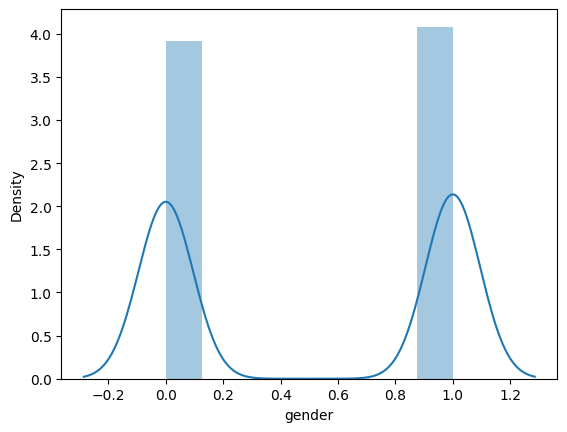

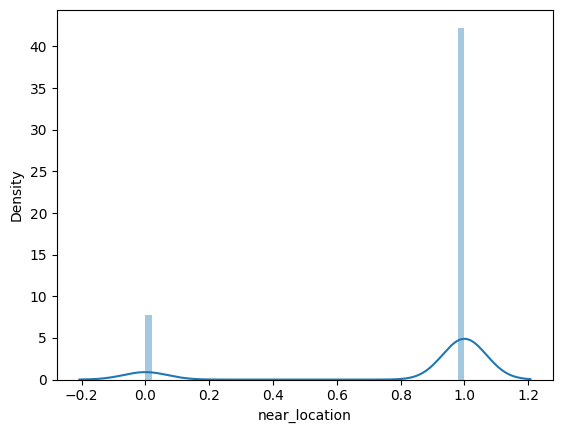

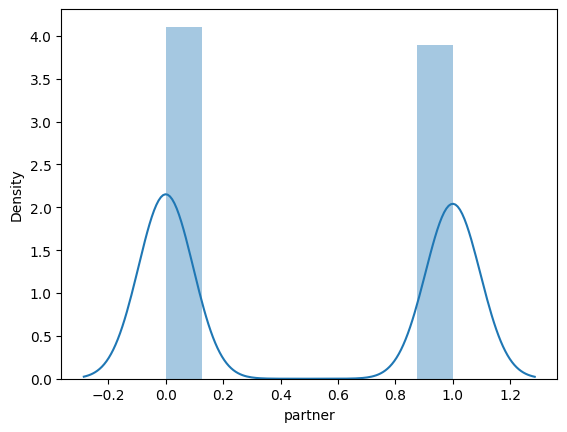

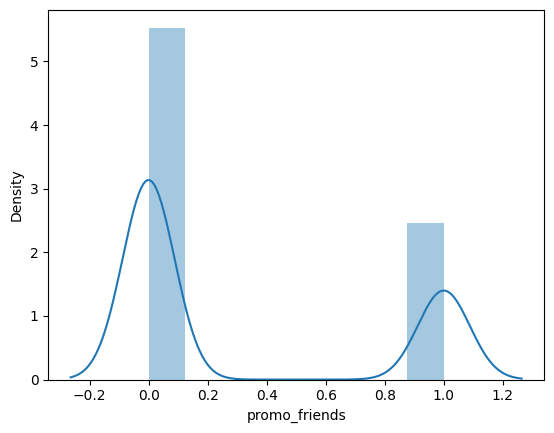

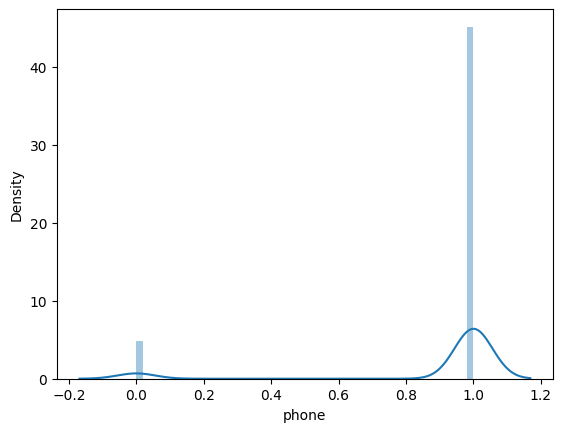

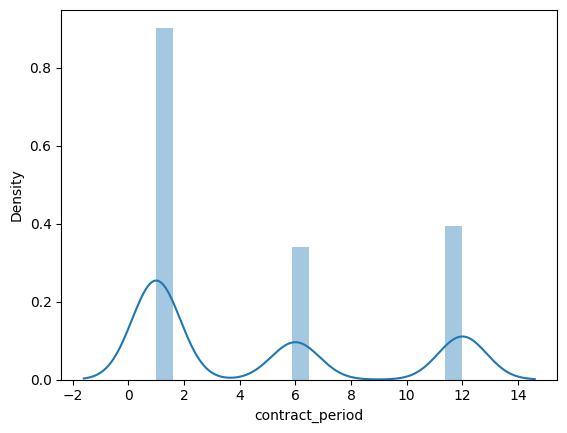

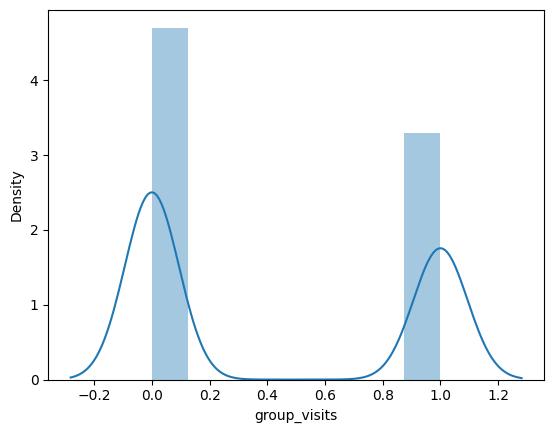

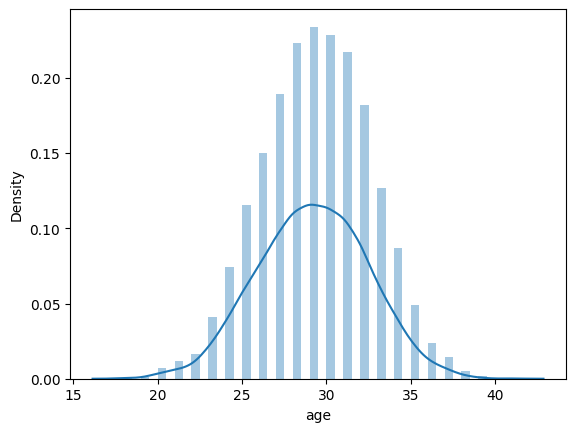

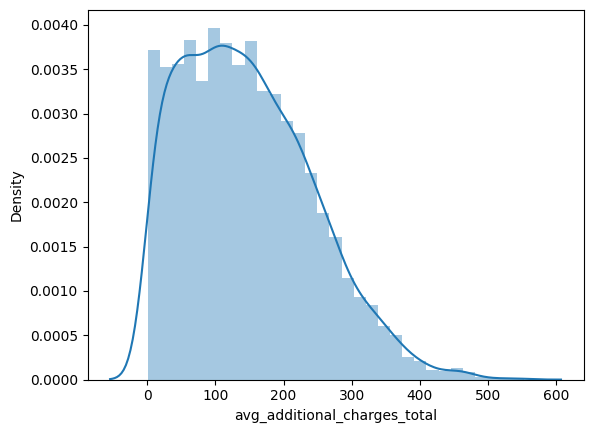

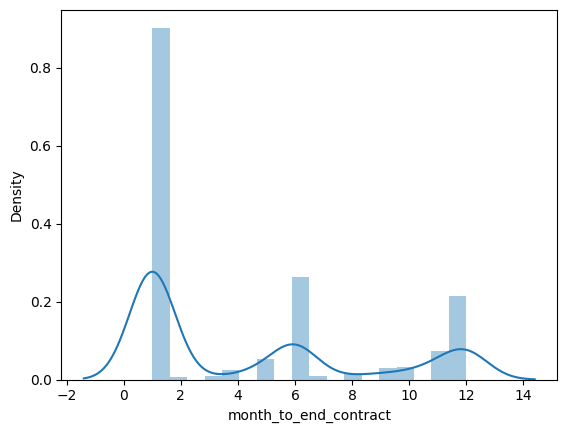

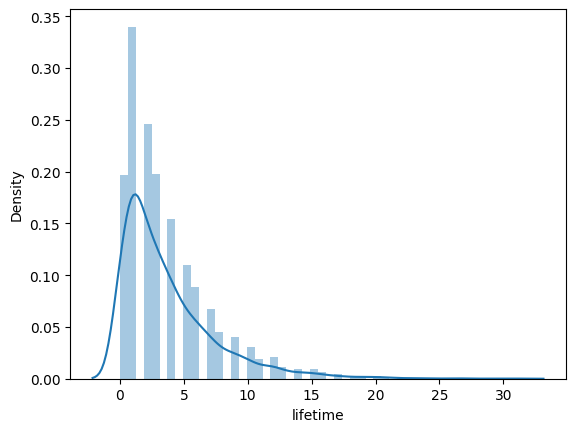

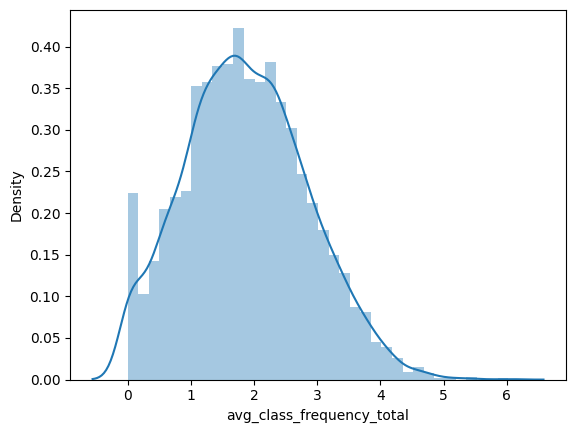

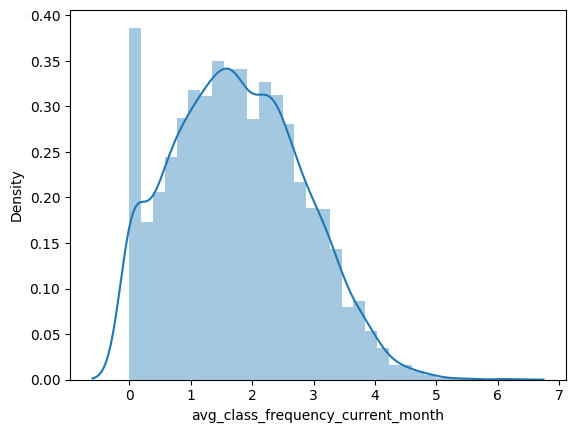

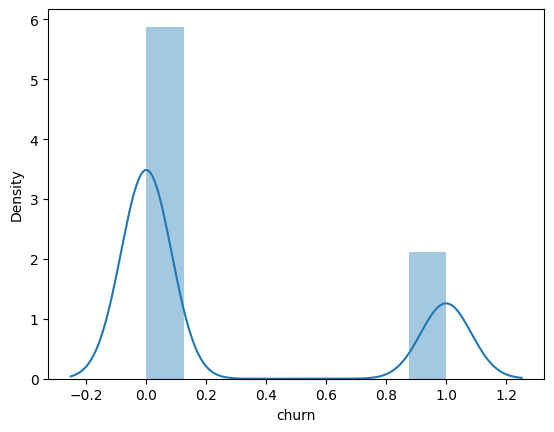

In [13]:
for variable in variables_numericas:
    sns.distplot(datos[variable], label= f"Distribucion de la columna{variable}")
    plt.show()


In [14]:
# Agrupamos los datos por los clientes que cacelaron y los que no, y trazamos histogramas de distribución:

In [44]:
clientes_no_cancel = datos[datos["churn"]==0]

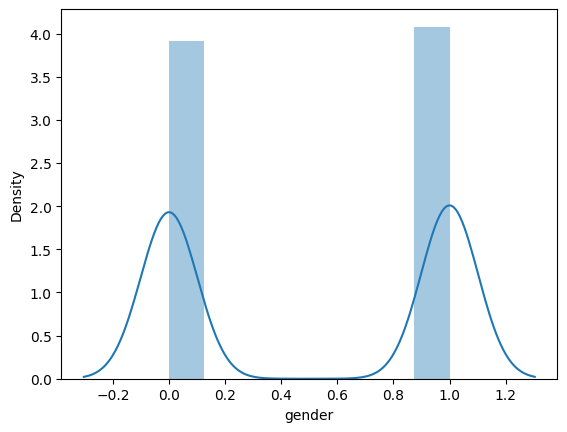

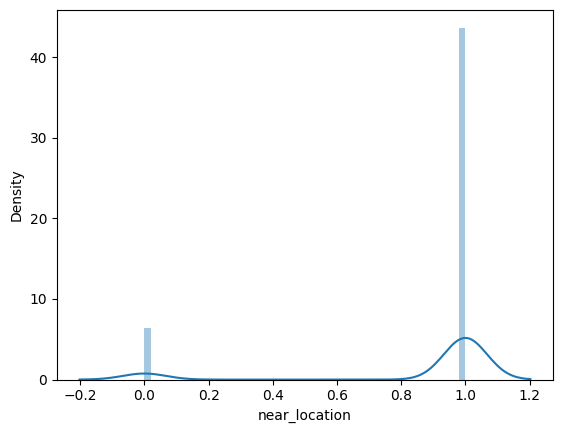

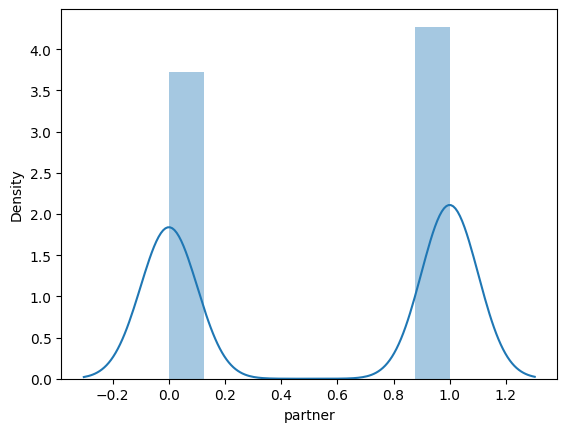

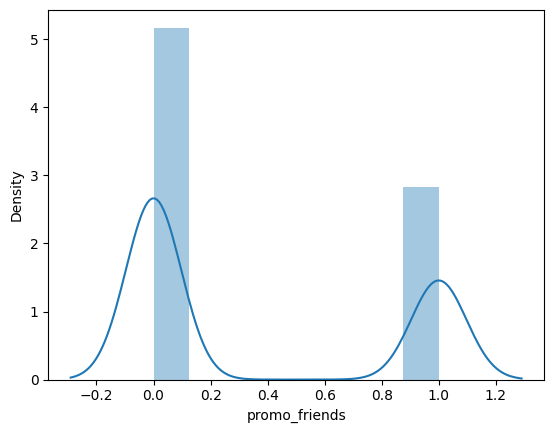

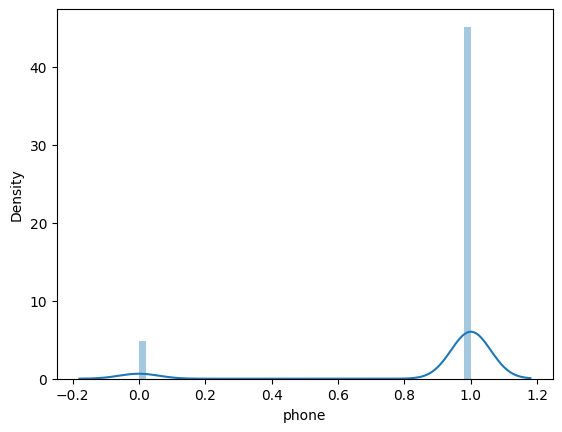

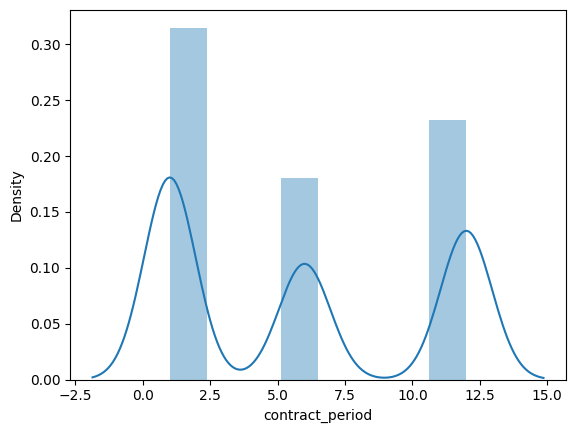

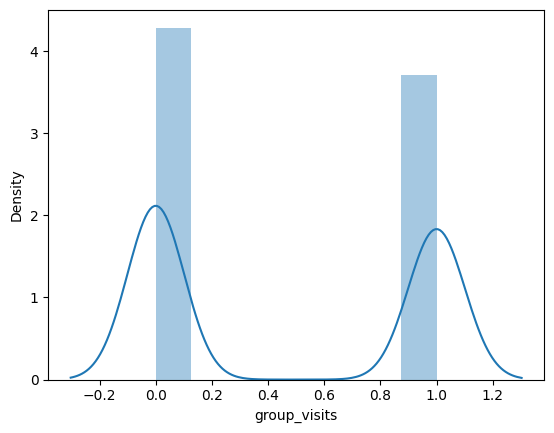

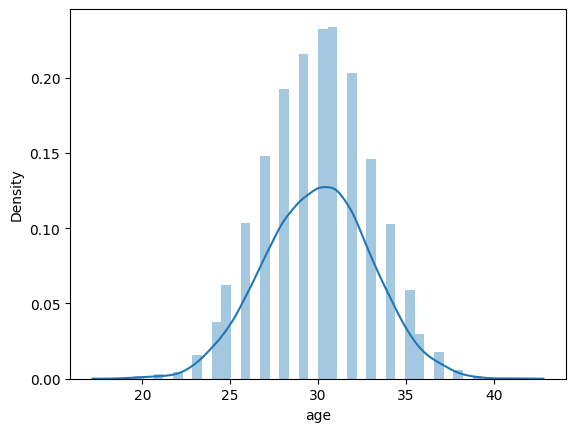

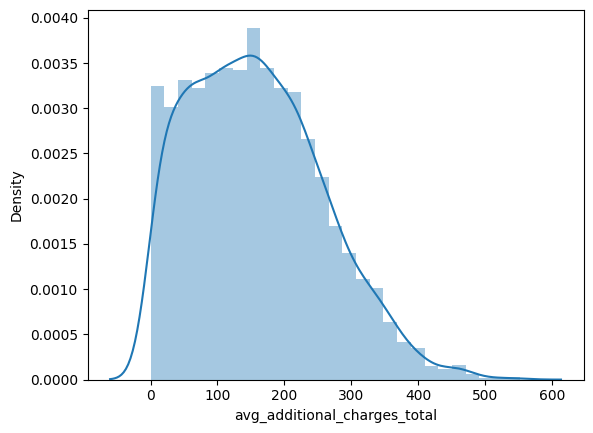

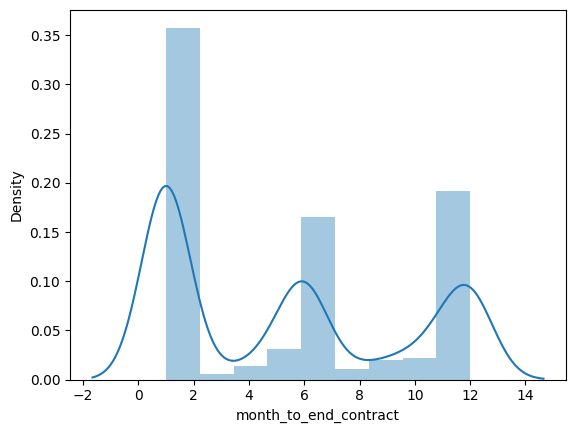

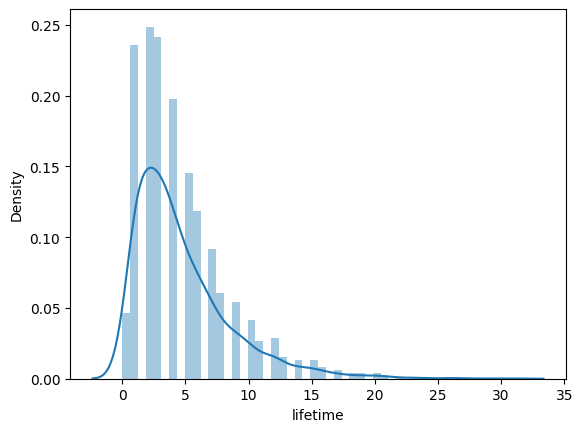

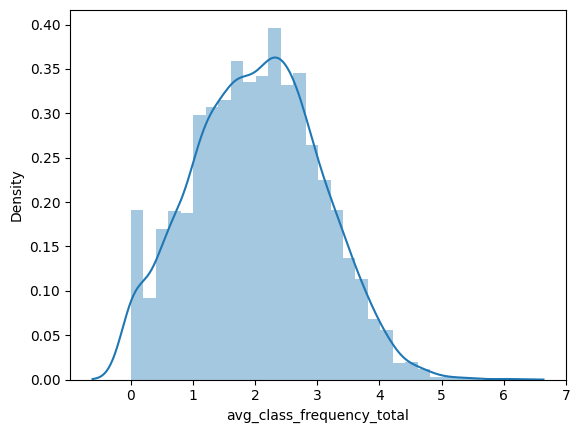

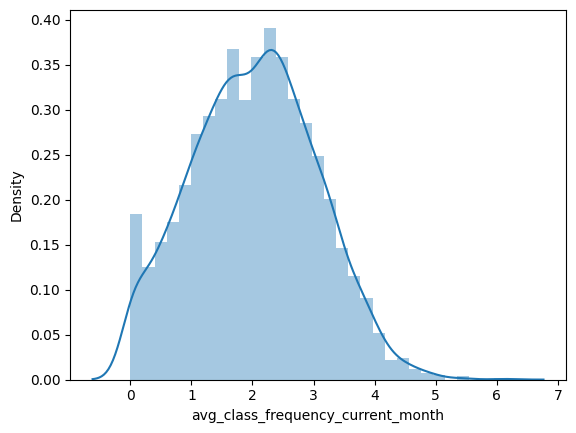

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


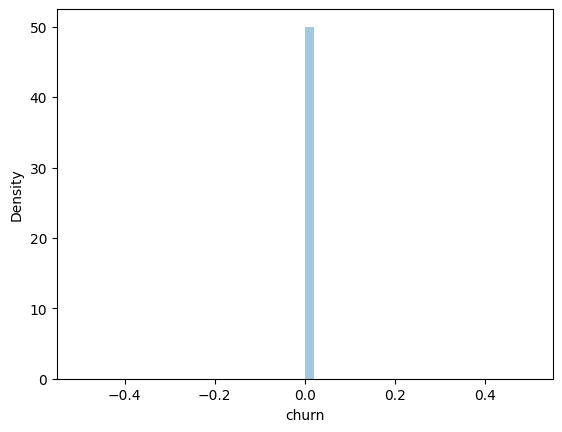

In [45]:
for variable in variables_numericas:
    sns.distplot(clientes_no_cancel[variable], label= f"Distribucion de la columna{variable}")
    plt.show()

In [46]:
clientes_cancel = datos[datos["churn"]==1]

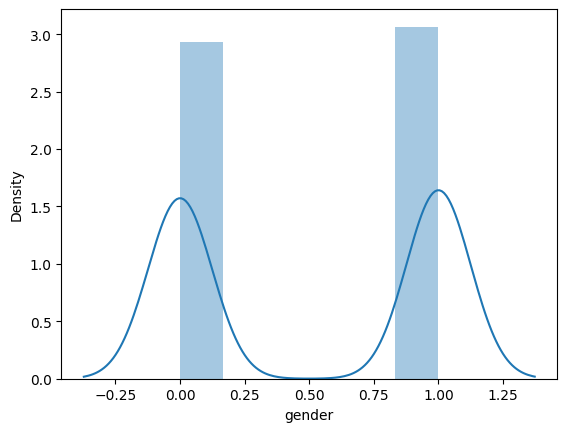

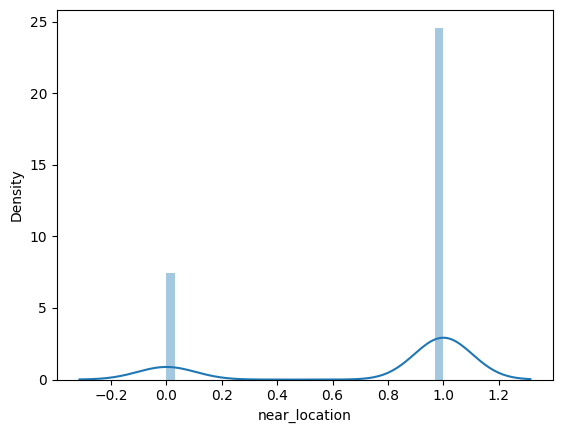

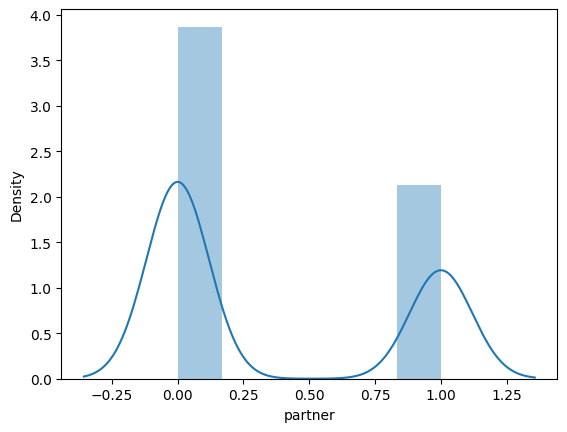

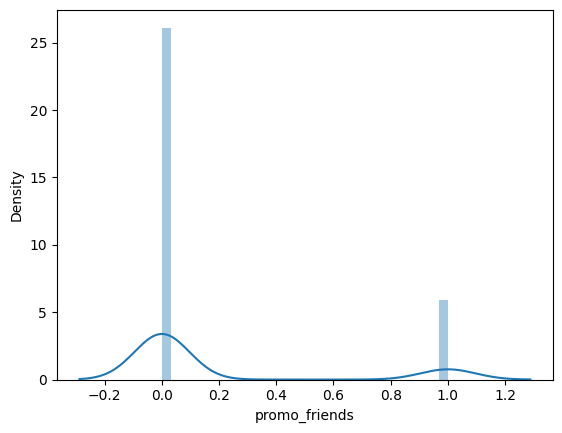

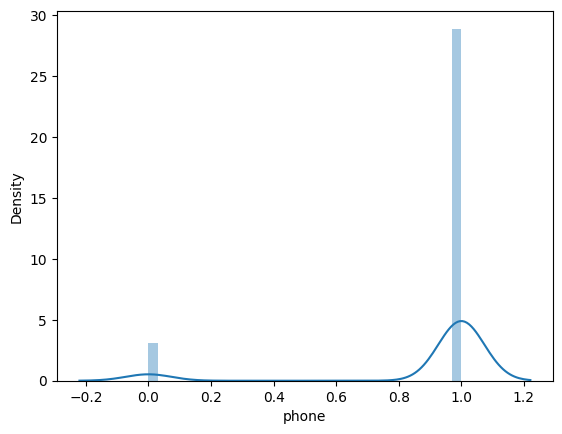

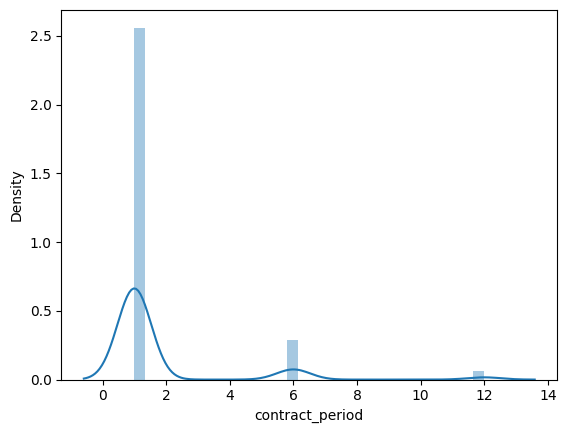

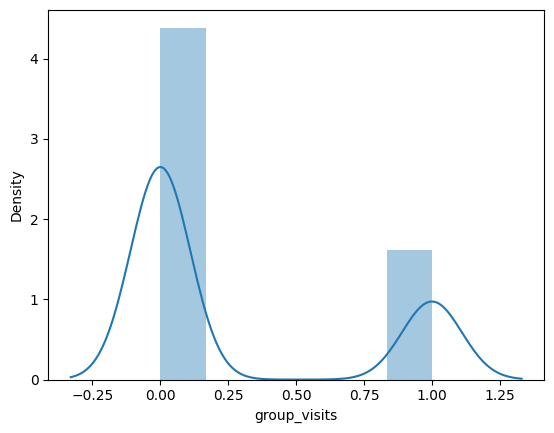

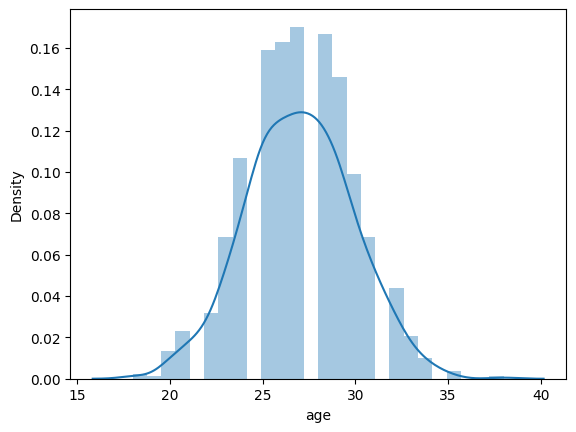

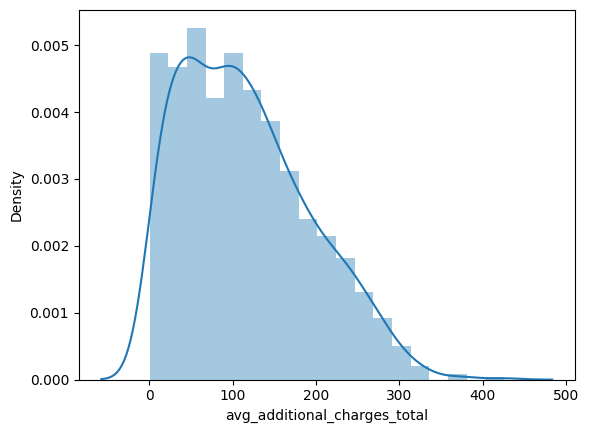

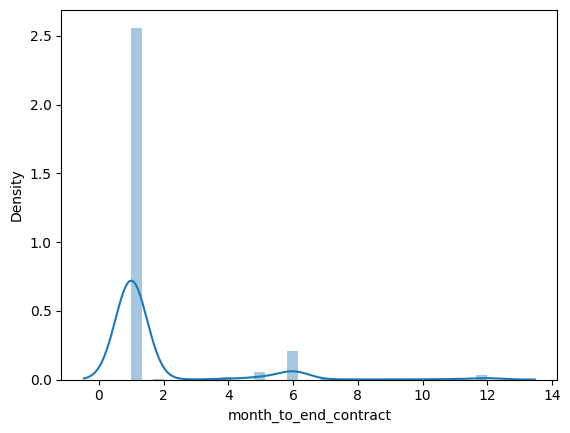

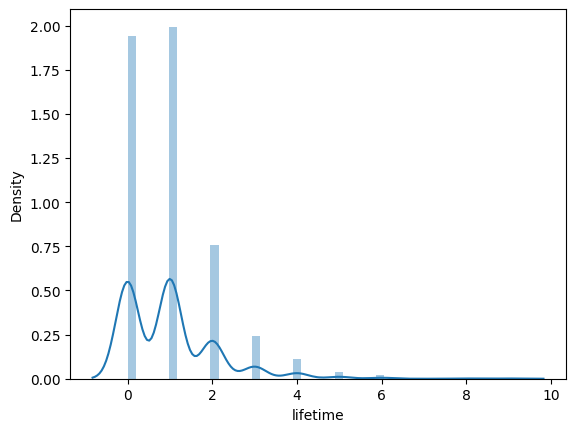

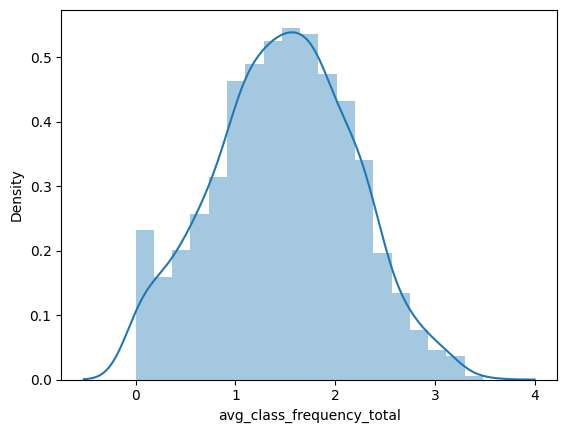

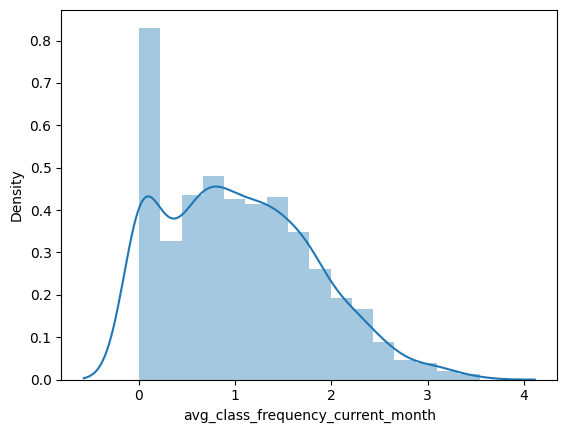

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


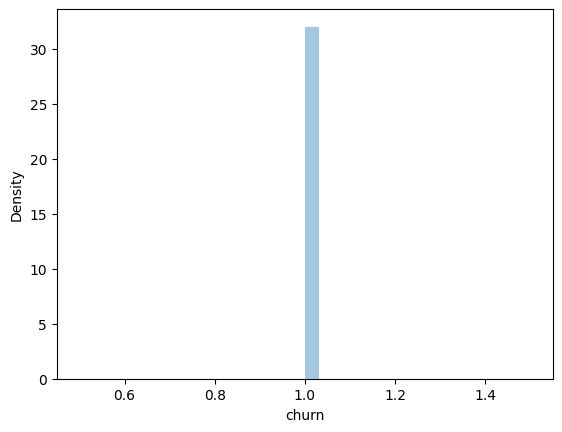

In [47]:
for variable in variables_numericas:
    sns.distplot(clientes_cancel[variable], label= f"Distribucion de la columna{variable}")
    plt.show()

De acuerdo con las características medias por grupo y los gráficos de distribución, observamos que los usuarios que cancelaron:

    •	Viven cerca en su mayoría.

    •	En su mayoría, no trabajan en una compañía asociada.

    •	En su mayoría, no se inscribieron mediante una oferta “trae a un/a amigo/a”.

    •	El periodo del contrato de estos clientes es principalmente de un mes.

    •	Normalmente estos usuarios no participan en visitas grupales.

    •	El promedio de edad es de 27 años.

    •	La cantidad promedio de dinero gastado en otros servicios del gimnasio es de 115 USD no muy lejos de las personas que no abandonaron (158 USD).

    •	En promedio les faltaba menos de dos meses para terminar el contrato. Se puede decir que esto tiene relación con el periodo medio del contrato (mencionado anteriormente).

    •	El tiempo de vida promedio de estos clientes es de 1 mes, comparada con los casi 5 meses de los clientes que no abandonaron es una diferencia relevante.

    •	La frecuencia media de visitas por semana a lo largo de la vida de estos clientes es de 1.

    •	La frecuencia media de visitas por semana durante el mes en curso de estos clientes es de 1.


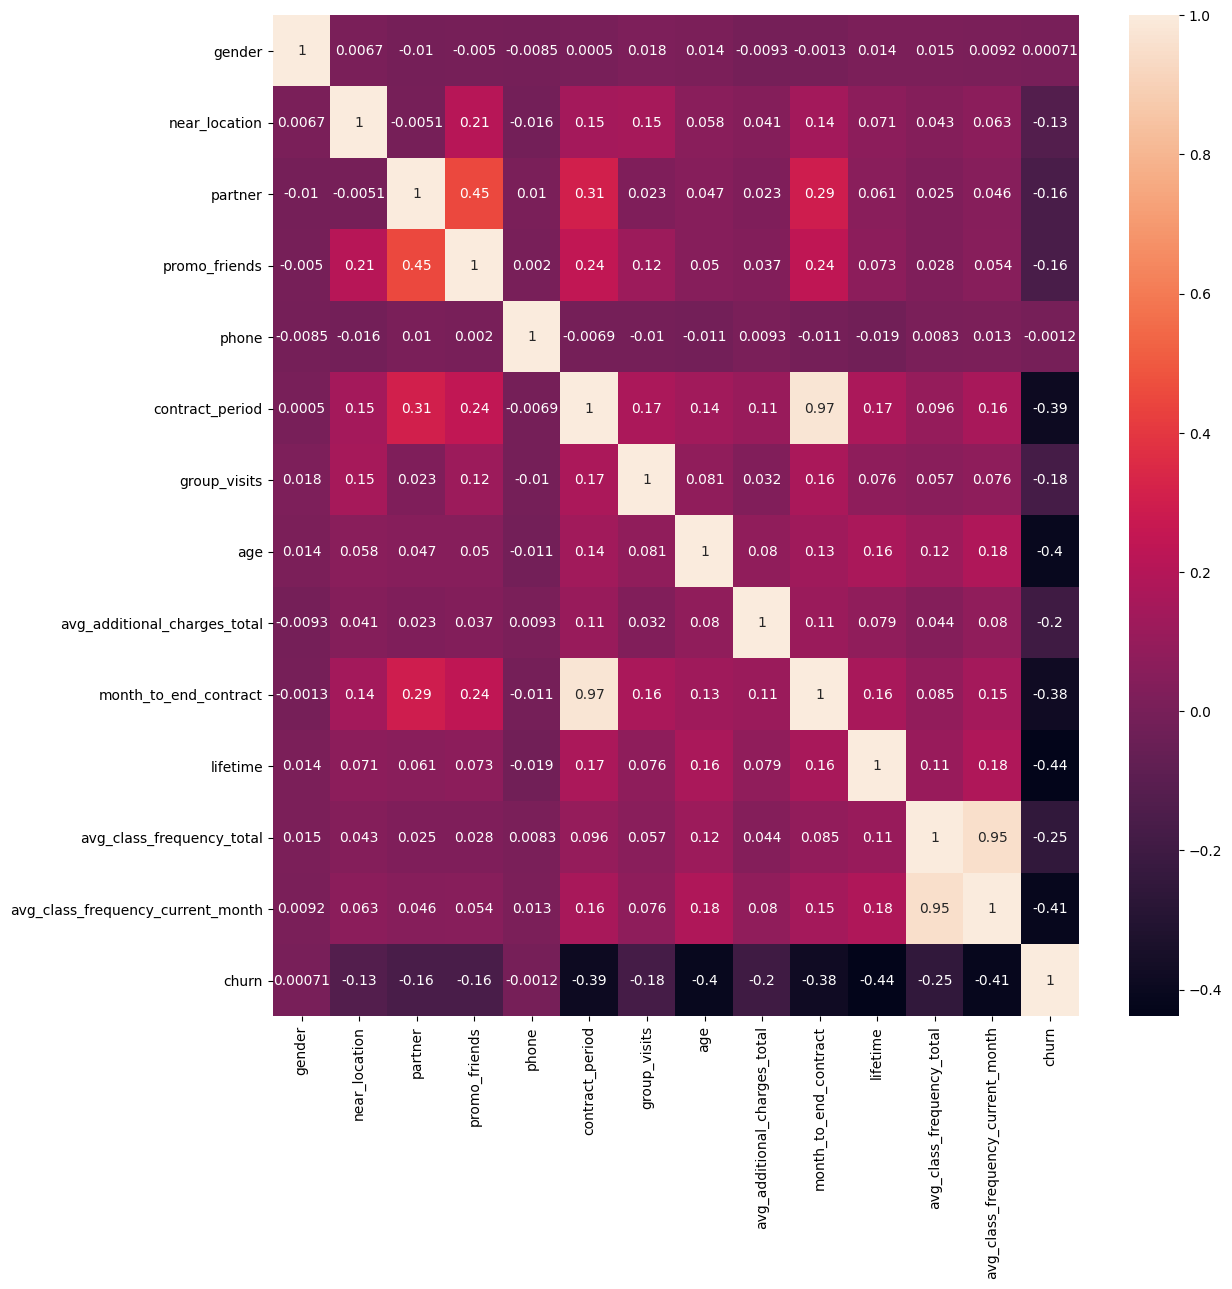

In [16]:
plt.figure(figsize=(13,13))
sns.heatmap(datos.corr(), annot=True)
plt.show()

* Según la matriz de correlación las variables con más correlación a la cancelación son la edad, el tiempo de vida y la frecuencia media de visitas por semana durante el mes en curso. Estas correlaciones son negativas y relativamente débiles ya que están entre el rango de 0.4 y 0.44.

# Construir un modelo para predecir la cancelación de usuarios

In [17]:
# Creamos el modelo de regresion logistica

In [18]:
caracteristicas = datos.drop(columns=["churn"])

In [19]:
meta = datos["churn"]

In [20]:
caracteristicas_entrenamiento, caracteristicas_validacion, meta_entrenamiento, meta_validacion = train_test_split(caracteristicas, meta, test_size=0.20, random_state=0)

In [21]:
modelo_ml = LogisticRegression()

In [22]:
# Entrenamos el modelo

In [23]:
modelo_ml.fit(caracteristicas_entrenamiento,meta_entrenamiento)

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# Realizamos predicciones con el modelo

In [25]:
prediccion_prob = modelo_ml.predict_proba(caracteristicas_validacion)
prediccion = modelo_ml.predict(caracteristicas_validacion)

In [26]:
print ('La exactitud del modelo logistico es:{:.2f}'.format(accuracy_score(meta_validacion,prediccion)))
print ('La precision del modelo logistico es:{:.2f}'.format(precision_score(meta_validacion,prediccion)))
print ('La recuperacion del modelo logistico es:{:.2f}'.format(recall_score(meta_validacion,prediccion)))

La exactitud del modelo logistico es:0.92
La precision del modelo logistico es:0.87
La recuperacion del modelo logistico es:0.81


In [27]:
# Creamos el modelo de bosque

In [28]:
for n_arboles in range(10,120,10):
    modelo_bosque = RandomForestClassifier(n_estimators=n_arboles, max_depth=20)
    modelo_bosque.fit(caracteristicas_entrenamiento,meta_entrenamiento)
    prediccion_arbol = modelo_bosque.predict(caracteristicas_validacion)
    
    print (f'Resultados con un modelo de bosque de {n_arboles}')
    print ('La exactitud del modelo logistico es:{:.2f}'.format(accuracy_score(meta_validacion,prediccion_arbol)))
    print ('La precision del modelo logistico es:{:.2f}'.format(precision_score(meta_validacion,prediccion_arbol)))
    print ('La recuperacion del modelo logistico es:{:.2f}'.format(recall_score(meta_validacion,prediccion_arbol)))
    print()

Resultados con un modelo de bosque de 10
La exactitud del modelo logistico es:0.91
La precision del modelo logistico es:0.83
La recuperacion del modelo logistico es:0.79

Resultados con un modelo de bosque de 20
La exactitud del modelo logistico es:0.91
La precision del modelo logistico es:0.84
La recuperacion del modelo logistico es:0.81

Resultados con un modelo de bosque de 30
La exactitud del modelo logistico es:0.92
La precision del modelo logistico es:0.85
La recuperacion del modelo logistico es:0.83

Resultados con un modelo de bosque de 40
La exactitud del modelo logistico es:0.91
La precision del modelo logistico es:0.84
La recuperacion del modelo logistico es:0.80

Resultados con un modelo de bosque de 50
La exactitud del modelo logistico es:0.92
La precision del modelo logistico es:0.85
La recuperacion del modelo logistico es:0.81

Resultados con un modelo de bosque de 60
La exactitud del modelo logistico es:0.92
La precision del modelo logistico es:0.84
La recuperacion del 

# ¿Qué modelo dio mejores resultados?

El modelo conmejores resultados para el análisis es el bosque aleatorio, teniendo en cuenta que en los escenarios con 60 y 100 árboles la tasa de recuperación de este modelo fue de 0.82 y 0.83 respectivamente, comparada con la regresión logistica con un 0.81. Se le da mas peso a la tasa de recuperación, teniendo en cuenta que esta mejora cuando disminuyen los falsos negativos, es decir cuando disminuyen los clientes que no se iban a ir del gimnasio y se van.

In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

# Crear clústeres de usuarios/as

In [30]:
# Estandarizamos los datos.

In [31]:
scaler = StandardScaler() # crear un objeto de clase scaler (normalizador)
x_sc = scaler.fit_transform(datos.drop(columns = ['churn'])) # entrenar el normalizador y transformar el conjunto de datos

In [32]:
# Utilizamos la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada 
# y trazar un dendrograma.

In [33]:
linked = linkage(x_sc, method = 'ward')

In [34]:
# La variable linked almacena la tabla con los haces de objetos vinculados. Puede visualizarse como un dendrograma:

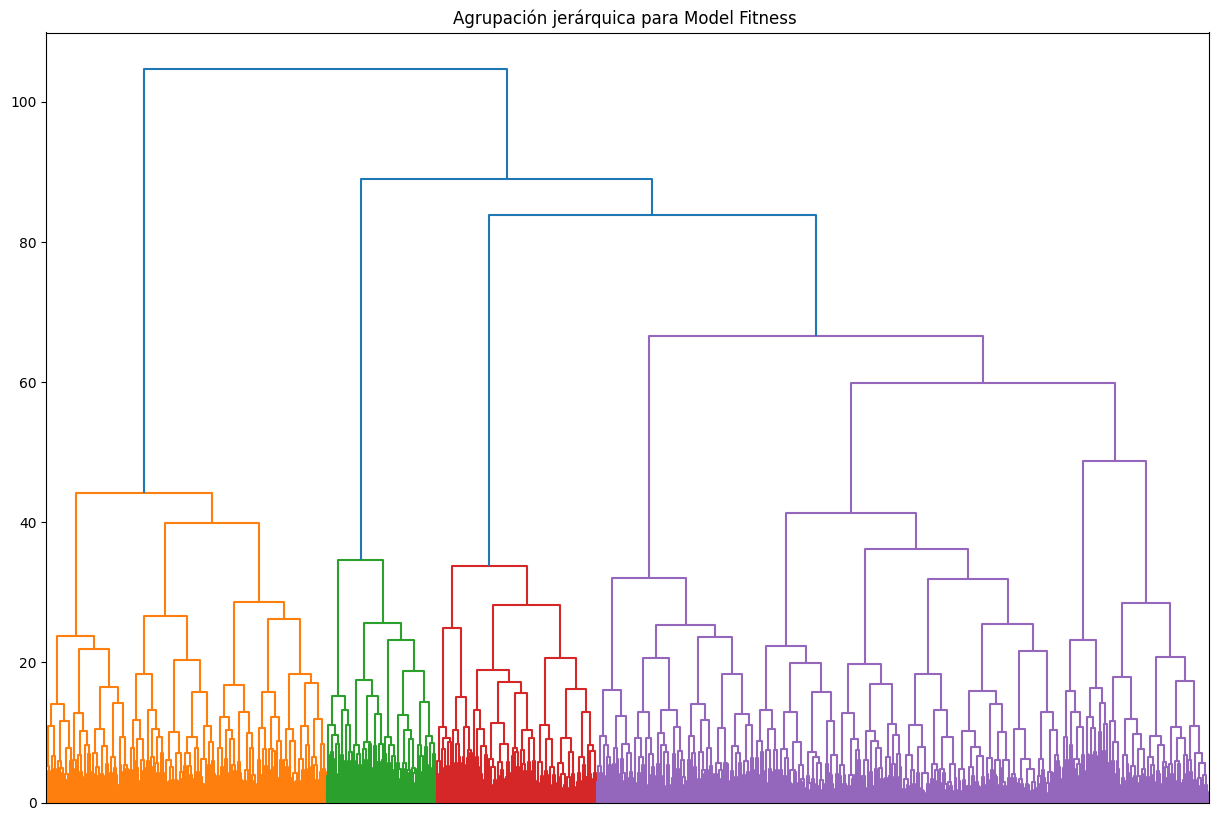

In [57]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para Model Fitness ')
plt.xticks(visible=False)
plt.show()


* El número óptimo de clústeres sugerido (4) corresponde a los cuatro colores diferentes del gráfico.

In [36]:
# Dejamos que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del
# estudiantado. 

In [37]:
km = KMeans(n_clusters = 5) # establecer el número de clústeres
labels = km.fit_predict(x_sc) # aplicar el algoritmo a los datos y formar un vector de clúster

In [38]:
# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
datos['cluster'] = labels

In [39]:
# obtenemos las estadísticas de los valores medios de las características por clúster
# y la tasa de cancelación para cada clúster (utilizando el método groupby()).
datos_clusters = datos.groupby(['cluster']).mean()

In [40]:
datos_clusters

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.484921,1.000000,0.351587,0.238889,1.000000,1.953968,0.340476,28.168254,131.556790,1.861905,2.430952,1.246780,1.011807,0.515079
2,0.503976,0.959245,0.783300,0.573559,1.000000,10.908549,0.544732,29.996024,160.733956,9.971173,4.740557,1.979852,1.972406,0.027833
3,0.559242,0.976303,0.356635,0.234597,0.998815,2.675355,0.472749,30.103081,161.712391,2.465640,4.901659,2.847978,2.846256,0.067536
4,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564


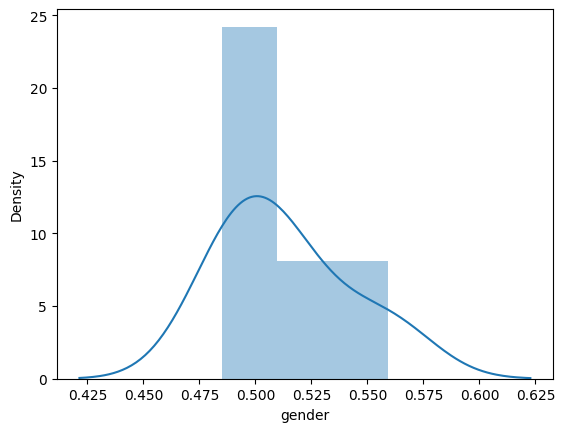

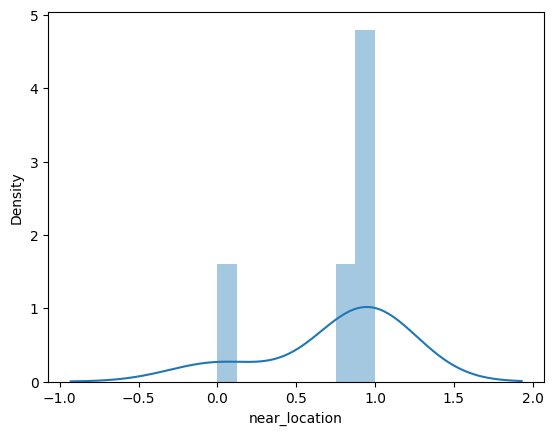

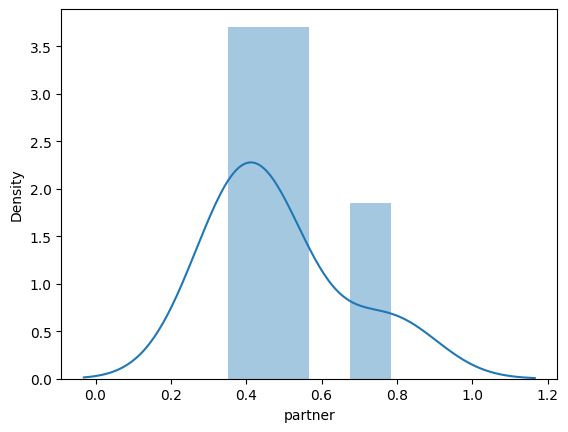

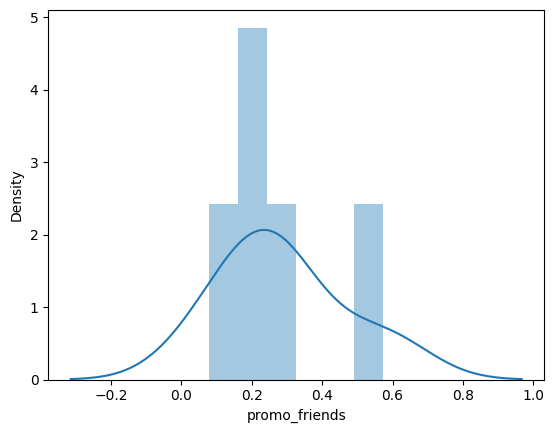

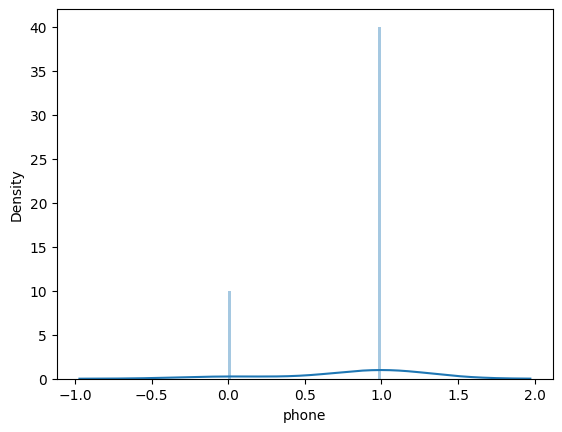

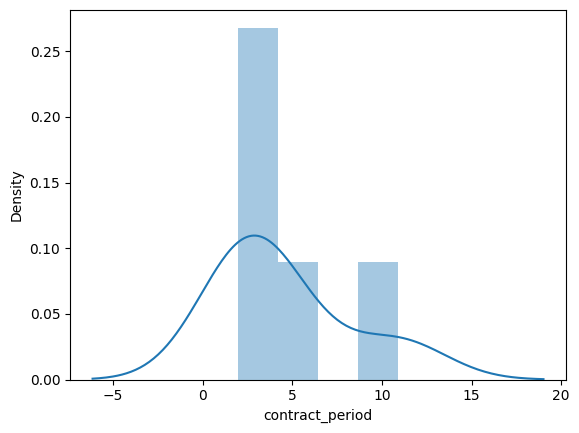

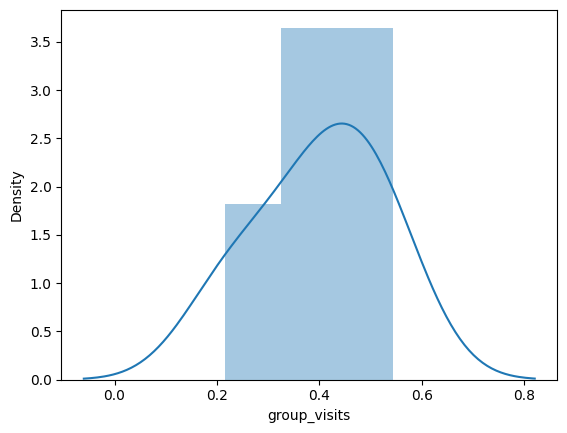

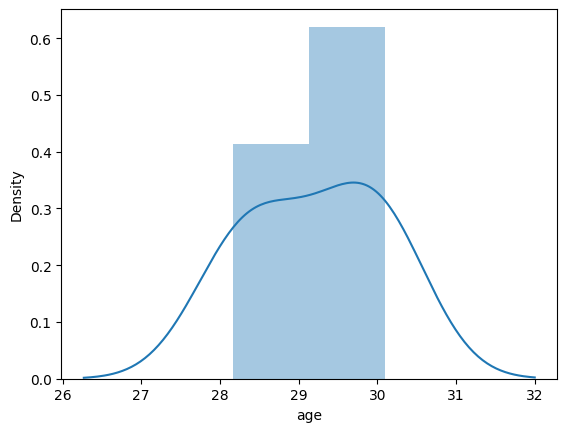

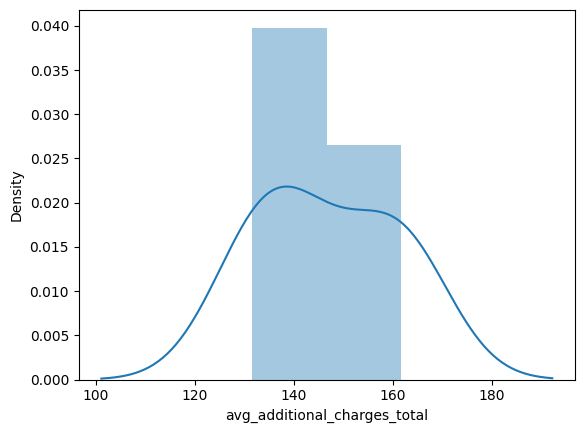

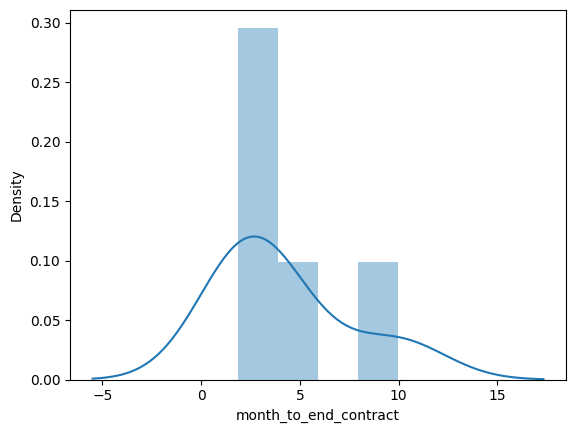

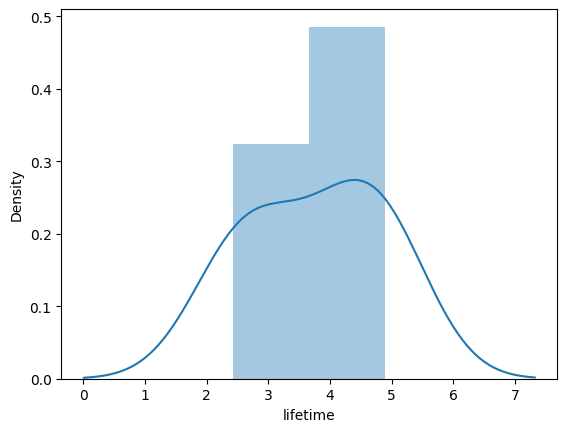

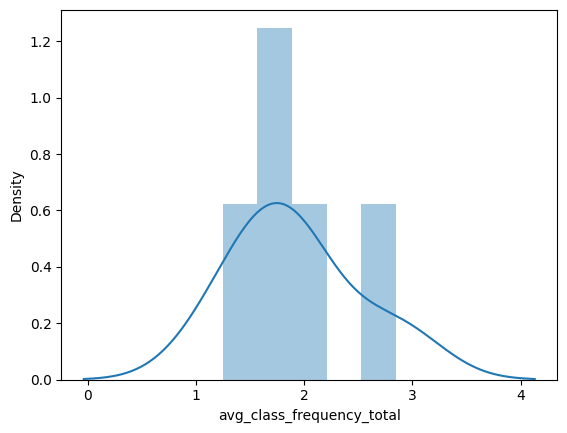

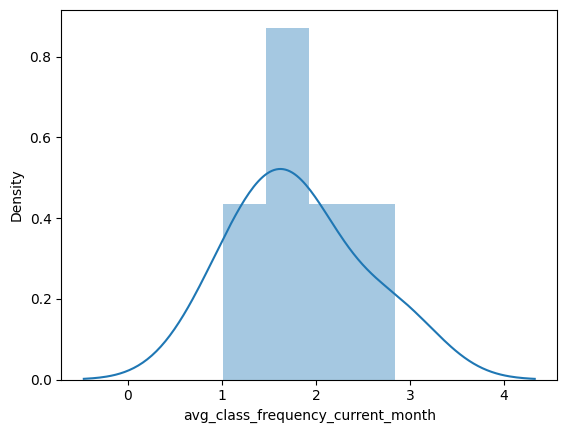

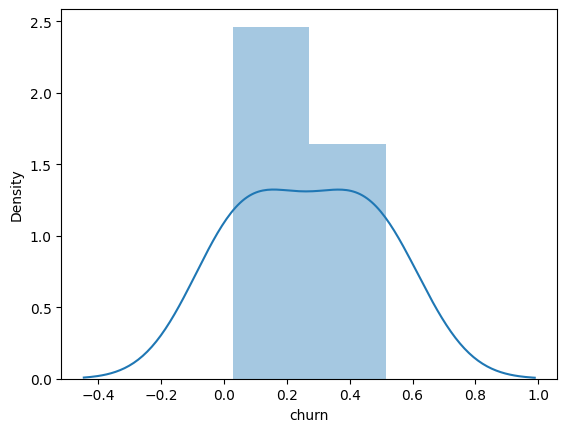

In [41]:
for variable in variables_numericas:
    sns.distplot(datos_clusters[variable], label= f"Distribucion de la columna{variable}")
    plt.show()


In [ ]:
# Creamos los histogramas distribución por cluster:

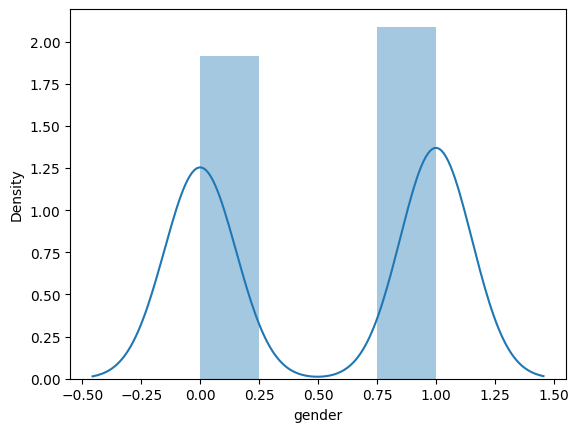

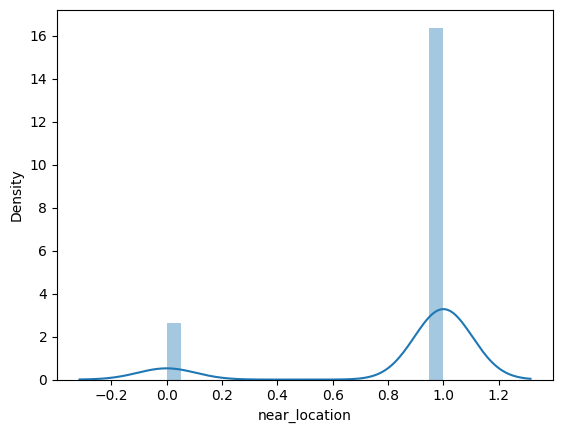

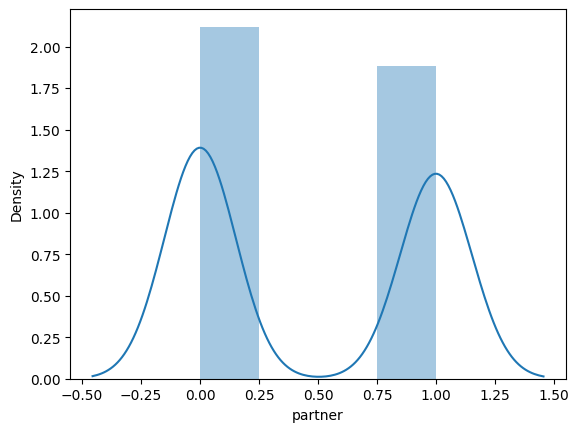

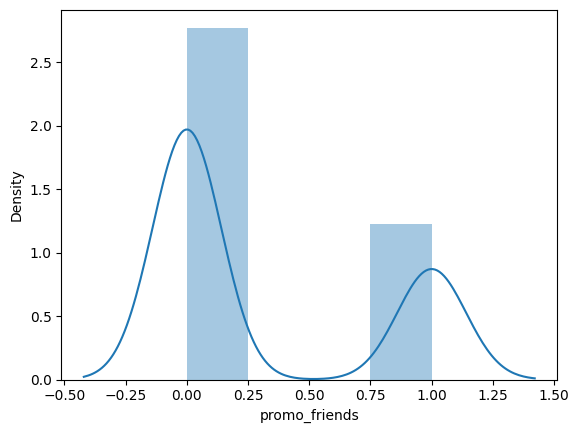

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


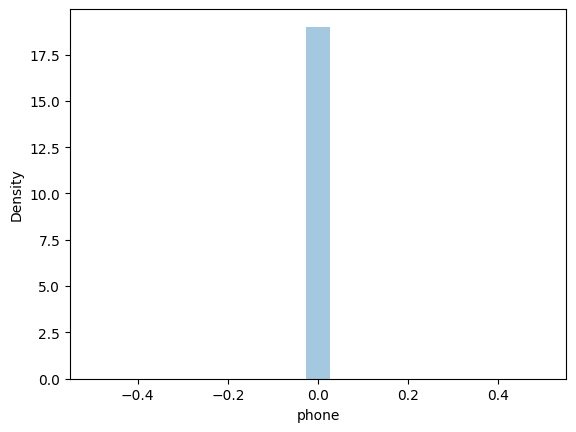

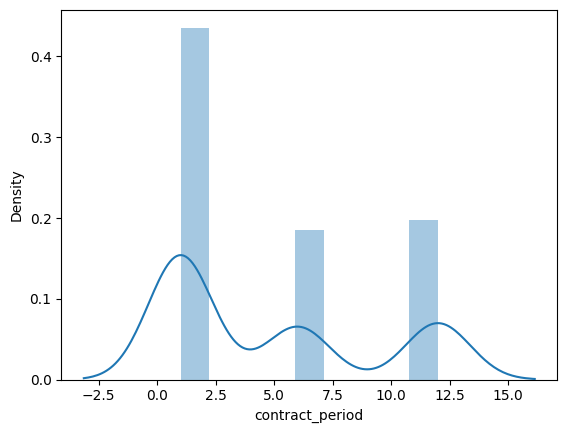

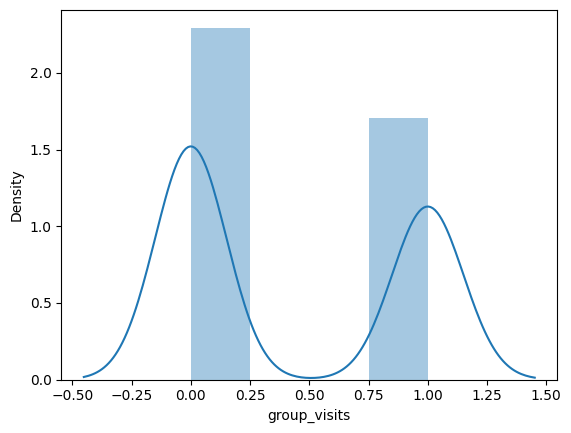

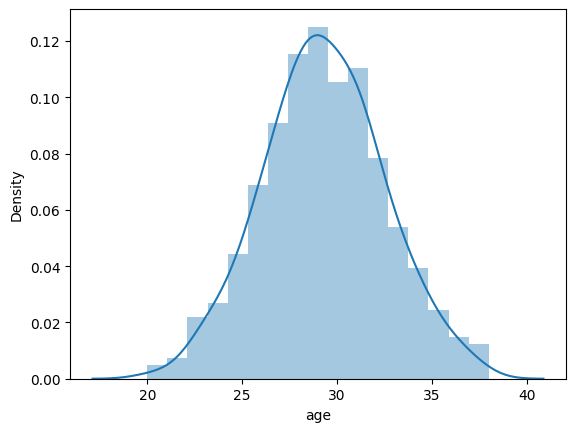

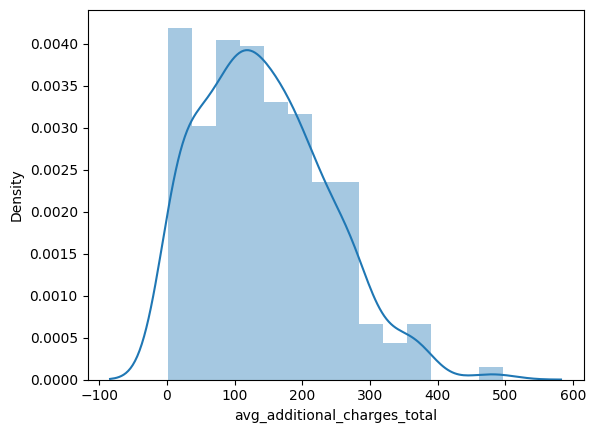

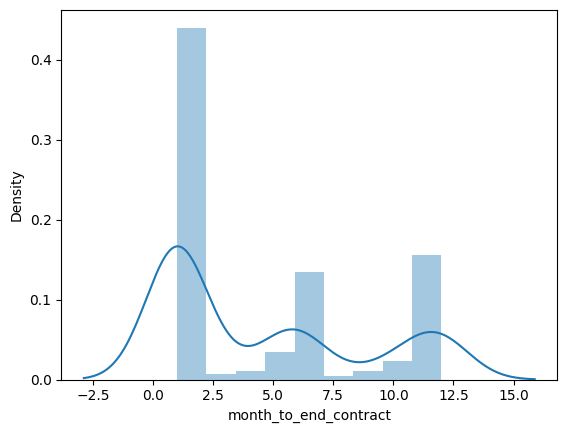

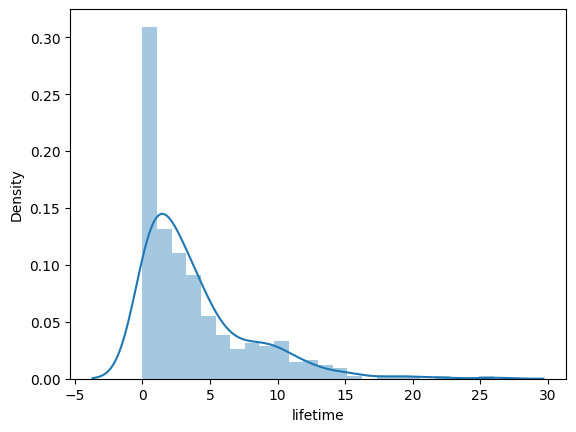

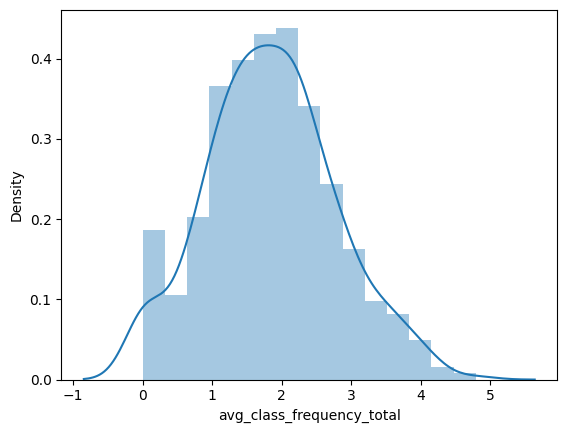

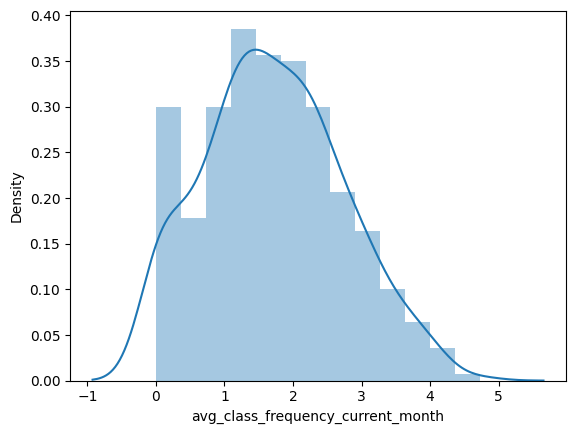

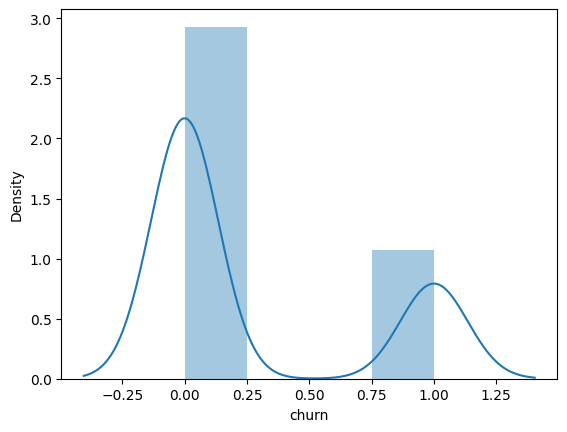

In [61]:
cluster_0 = datos[datos['cluster']==0]

for variable in variables_numericas:
    sns.distplot(cluster_0[variable], label= f"Distribucion de la columna{variable}")
    plt.show()

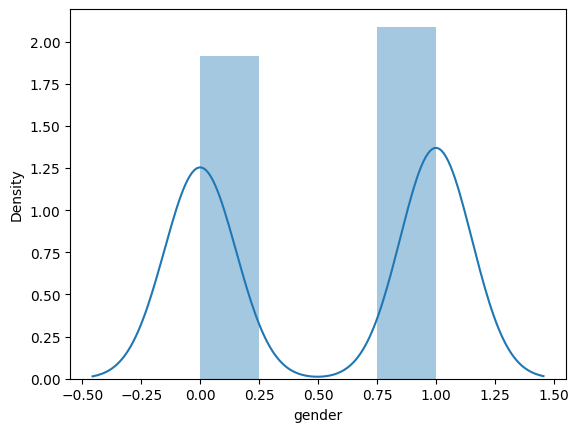

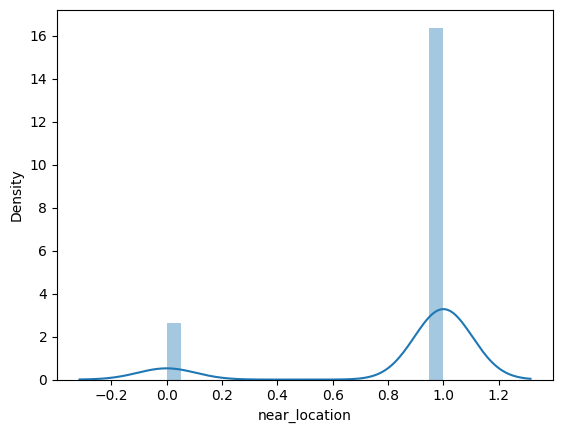

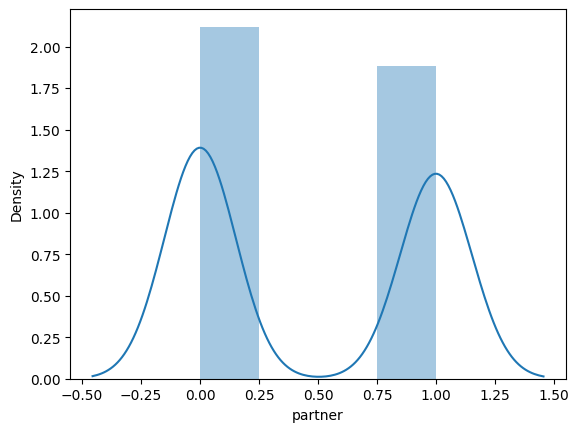

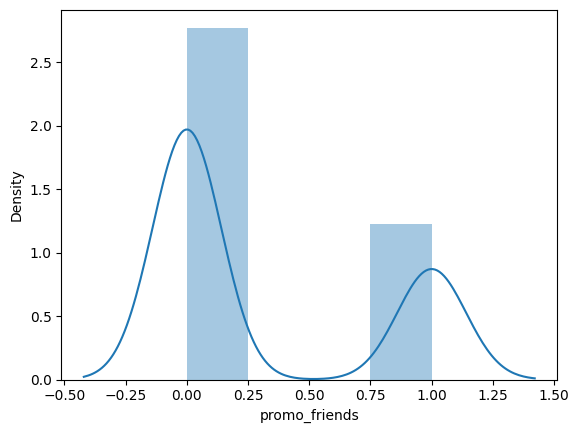

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


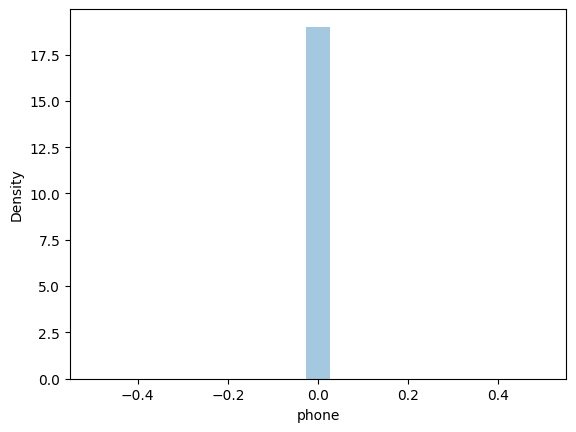

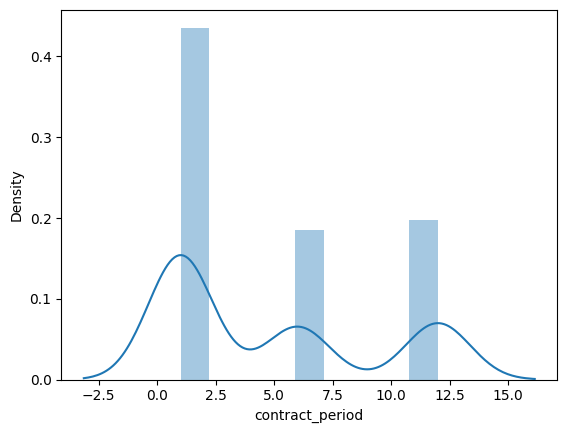

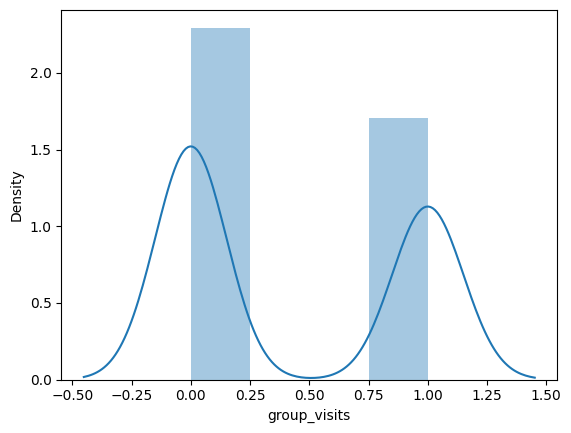

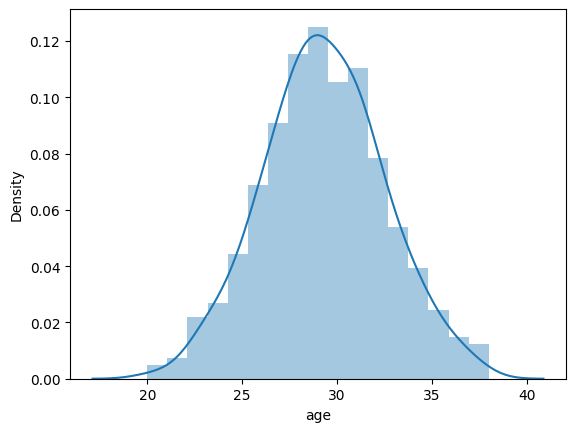

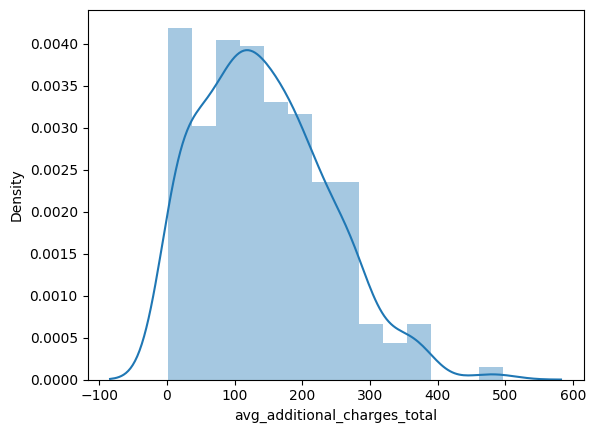

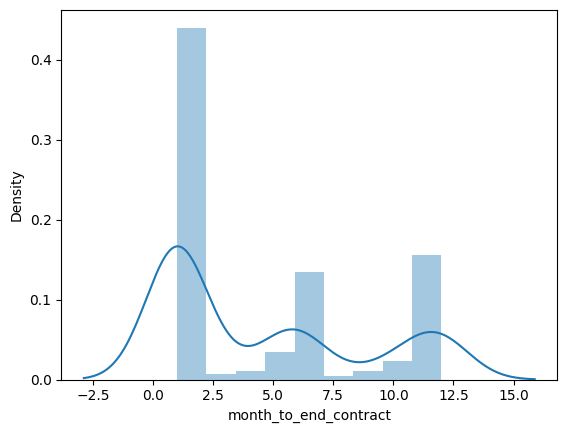

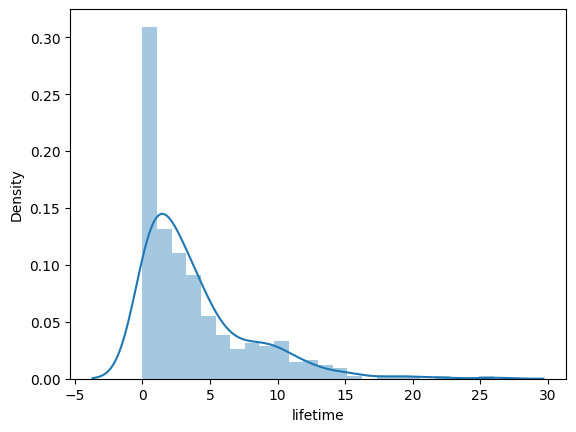

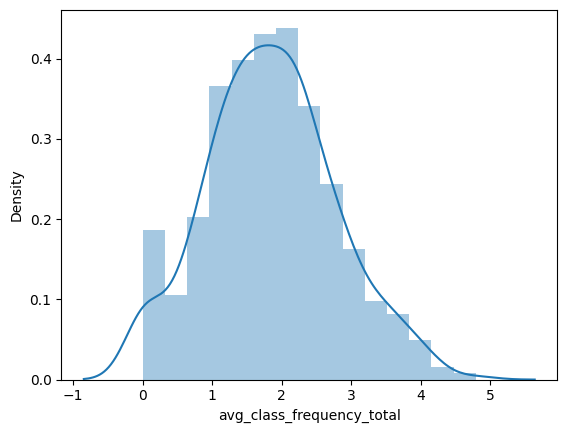

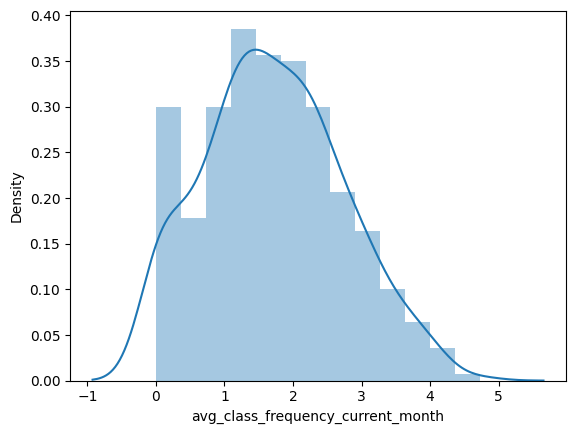

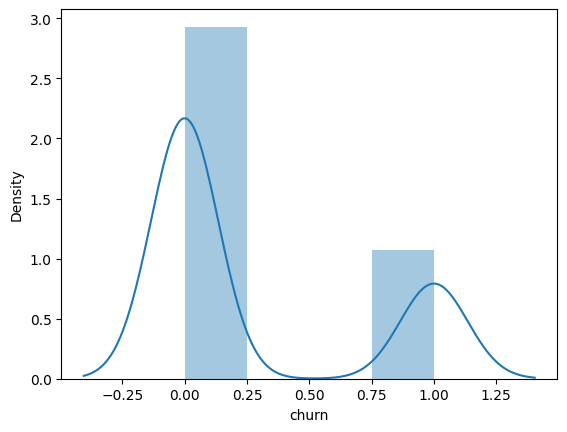

In [62]:
cluster_1 = datos[datos['cluster']==1]

for variable in variables_numericas:
    sns.distplot(cluster_0[variable], label= f"Distribucion de la columna{variable}")
    plt.show()

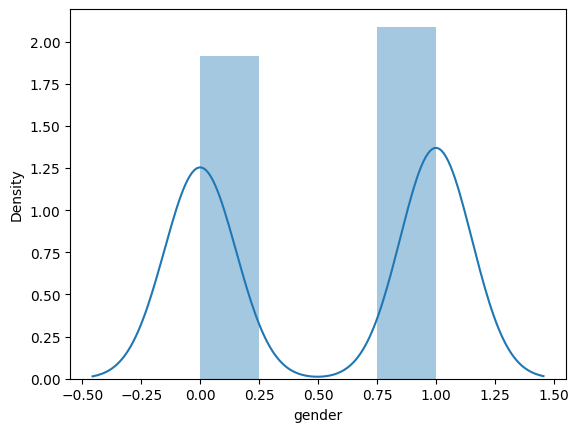

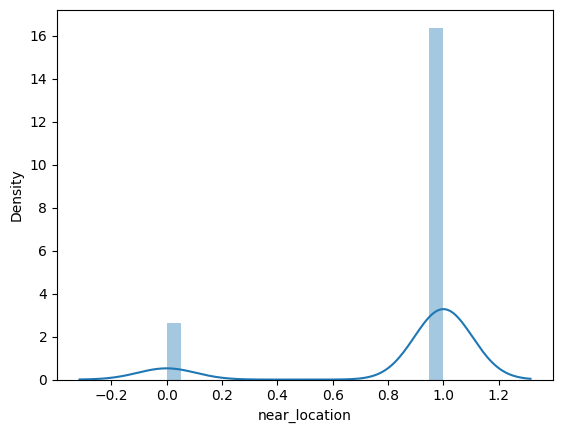

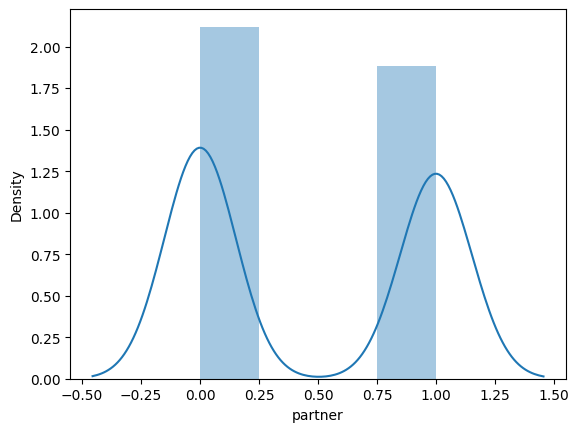

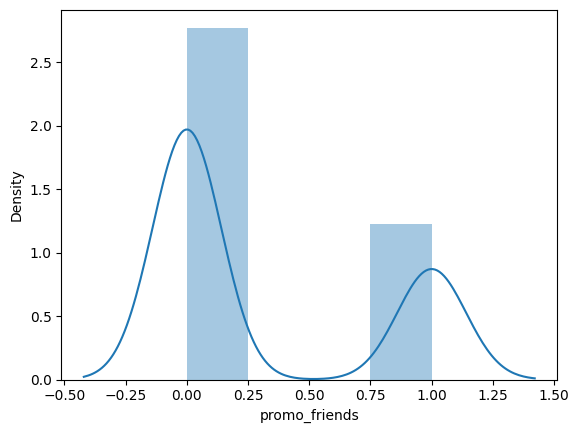

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


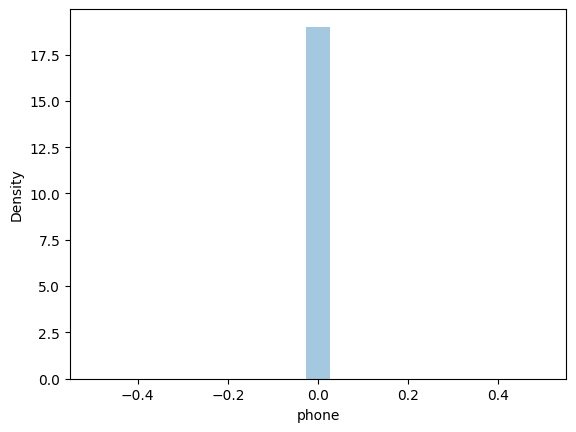

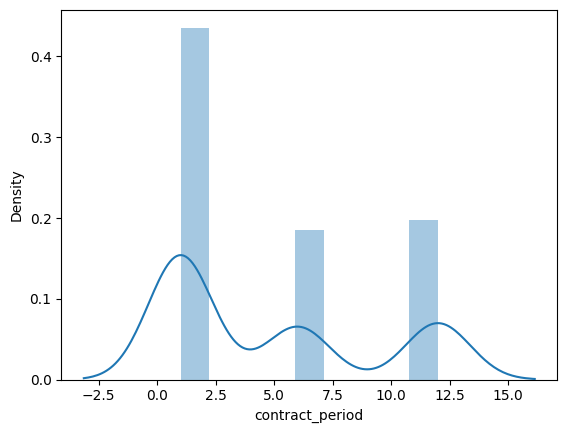

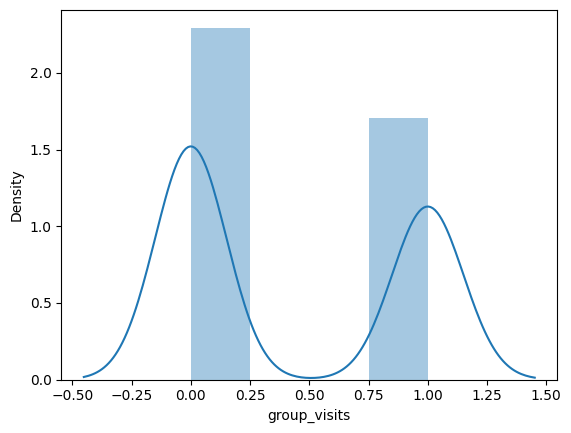

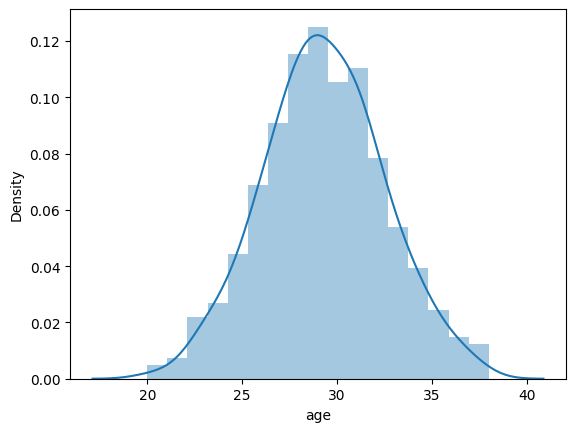

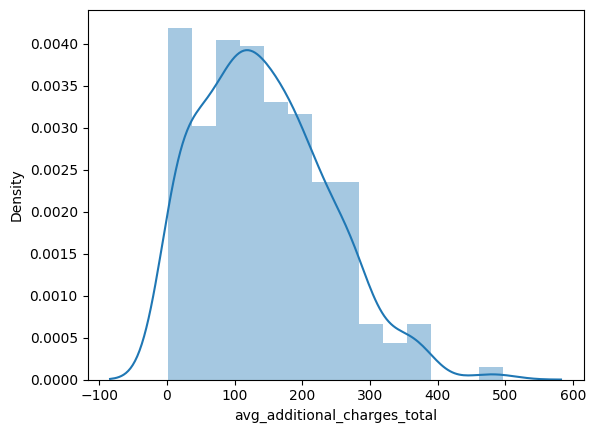

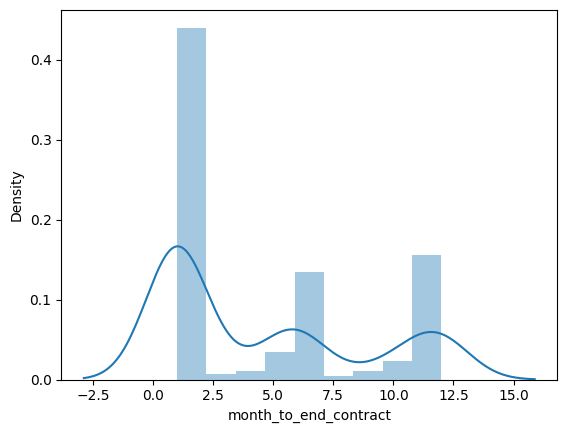

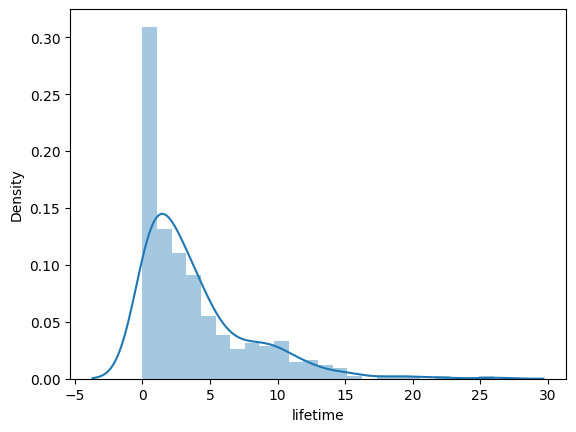

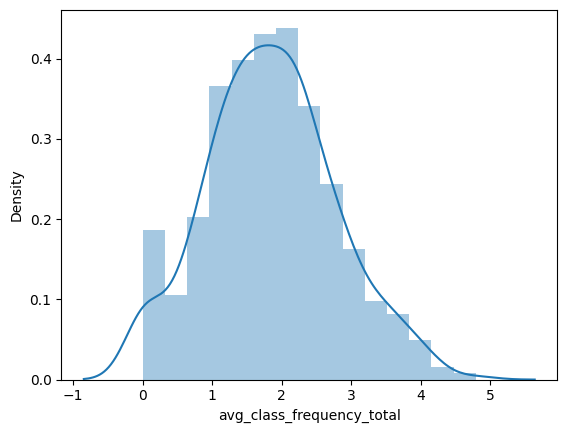

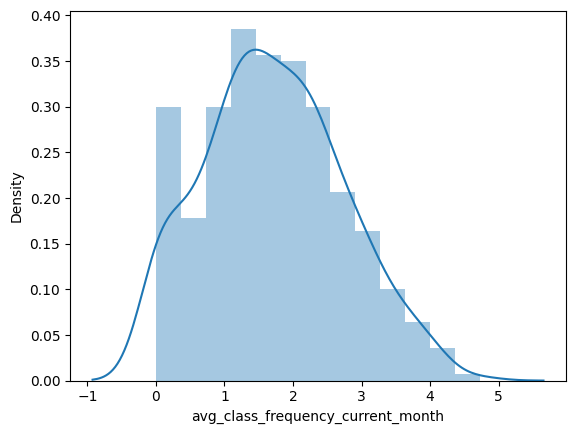

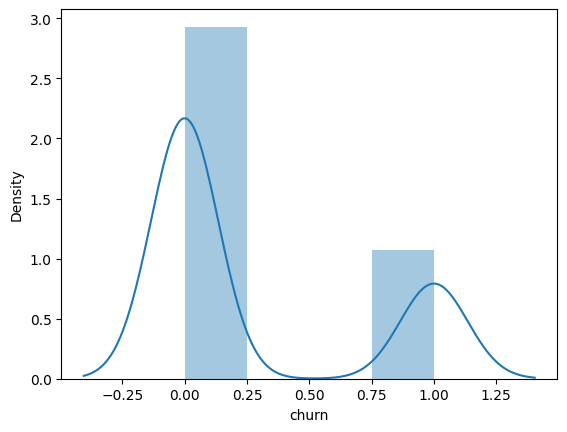

In [63]:
cluster_2 = datos[datos['cluster']==2]

for variable in variables_numericas:
    sns.distplot(cluster_0[variable], label= f"Distribucion de la columna{variable}")
    plt.show()

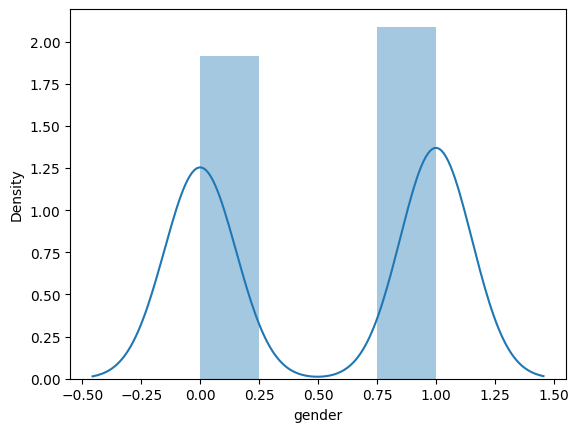

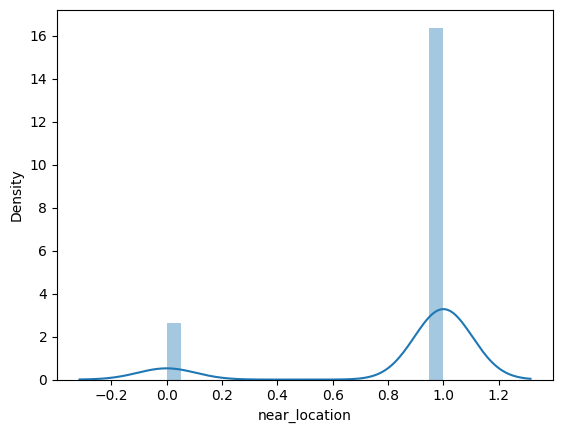

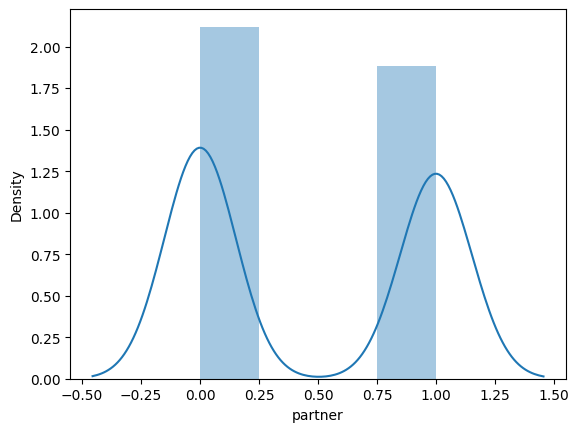

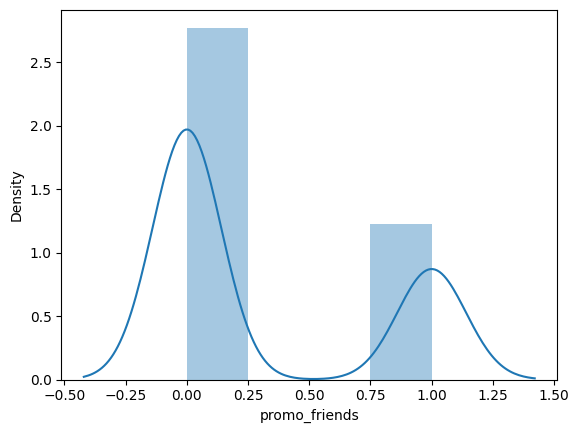

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


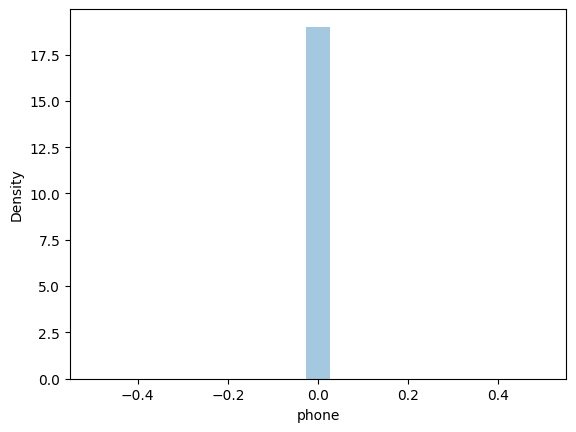

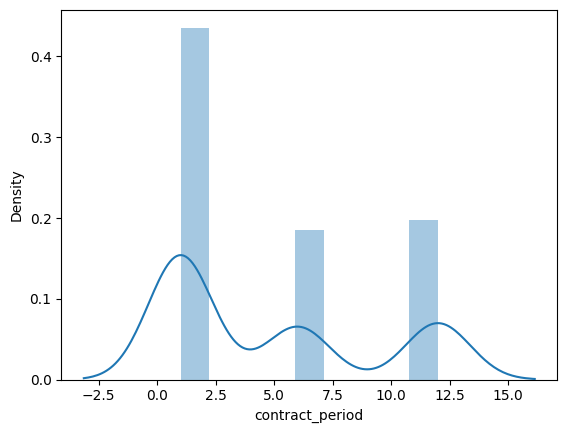

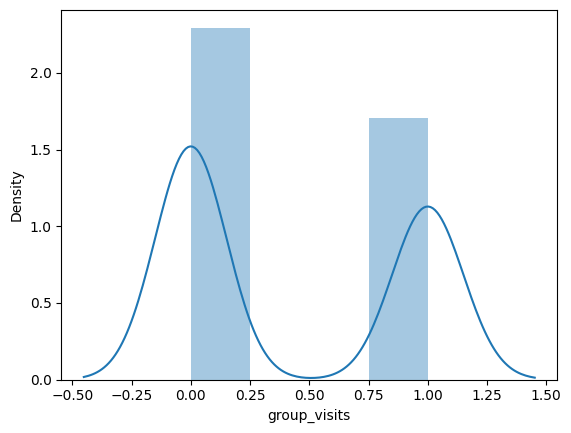

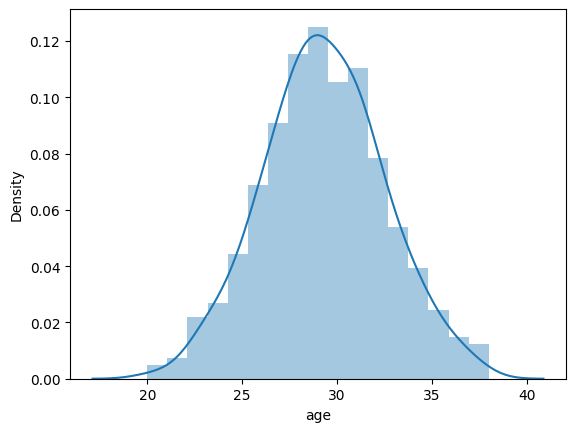

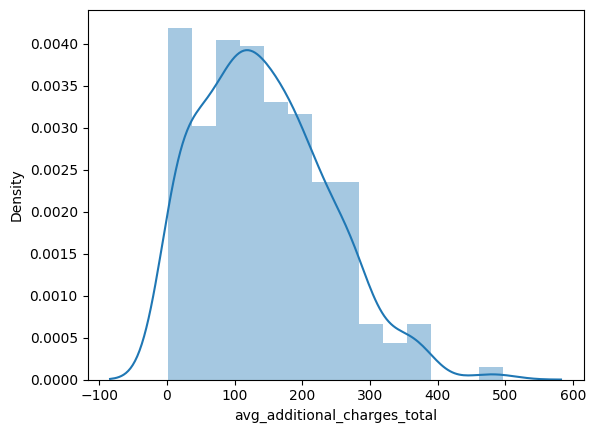

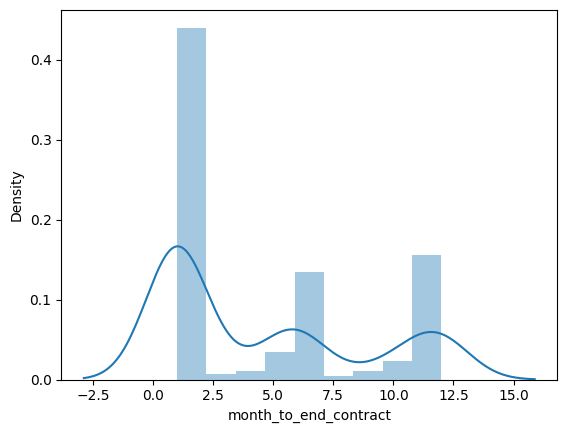

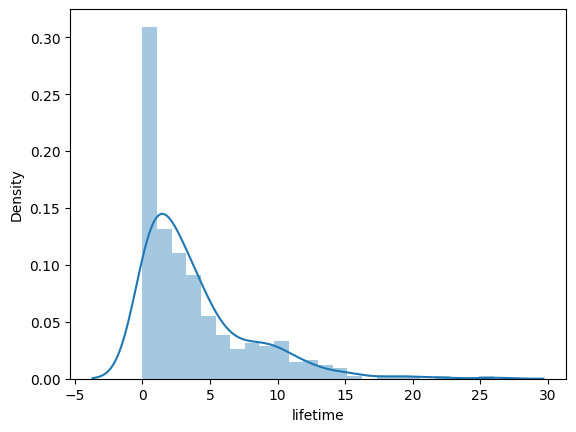

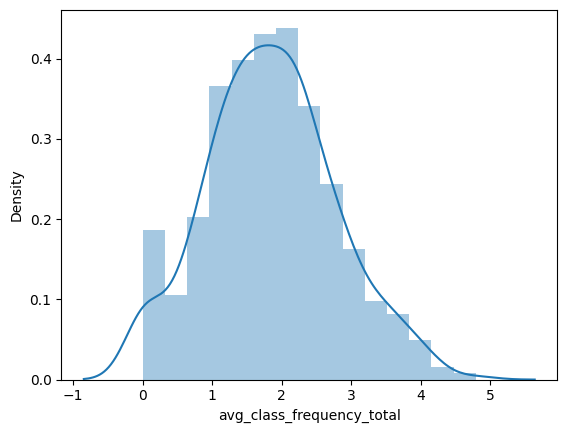

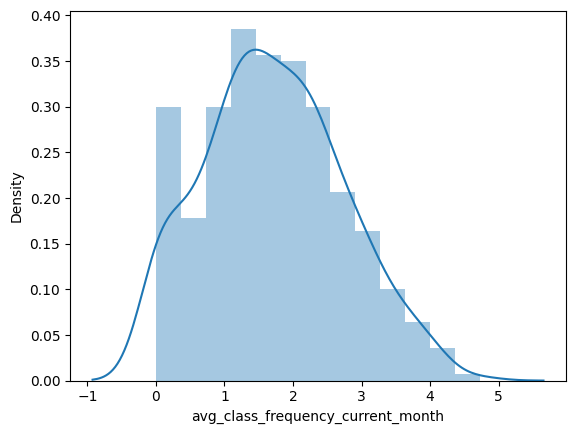

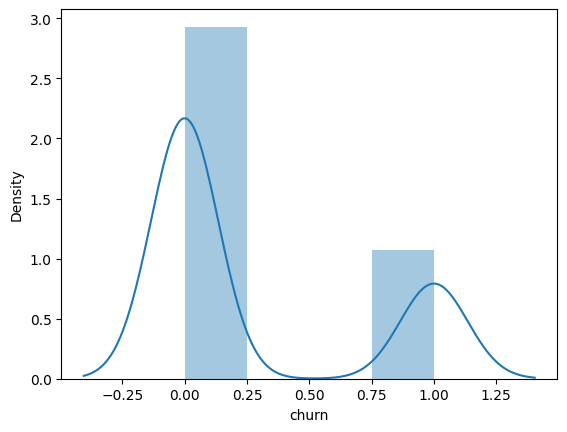

In [64]:
cluster_3 = datos[datos['cluster']==3]

for variable in variables_numericas:
    sns.distplot(cluster_0[variable], label= f"Distribucion de la columna{variable}")
    plt.show()

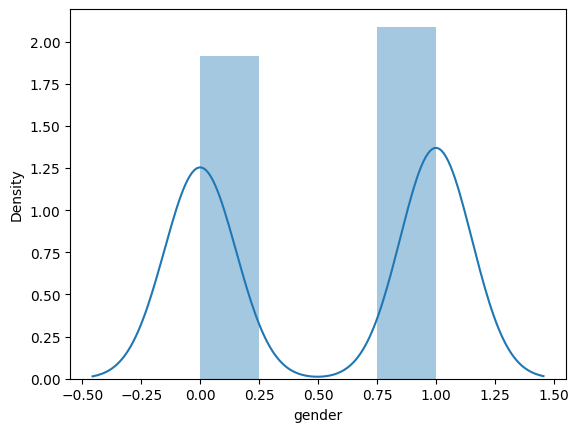

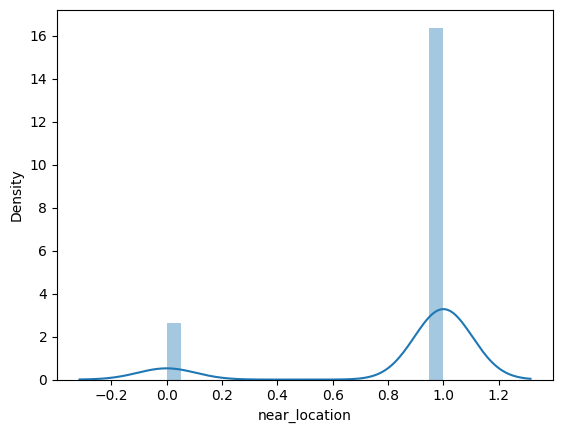

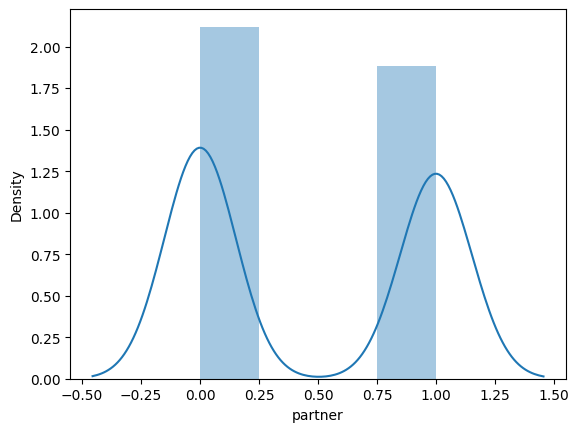

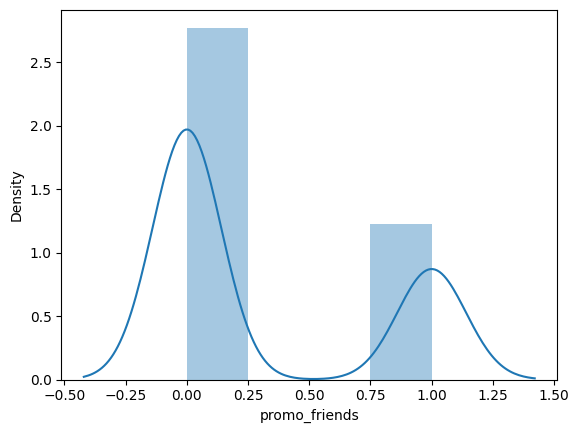

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


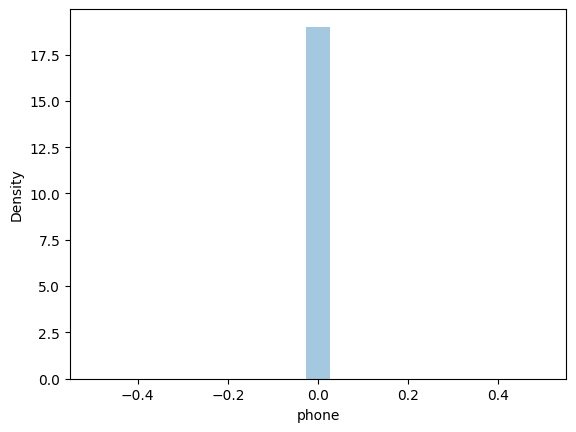

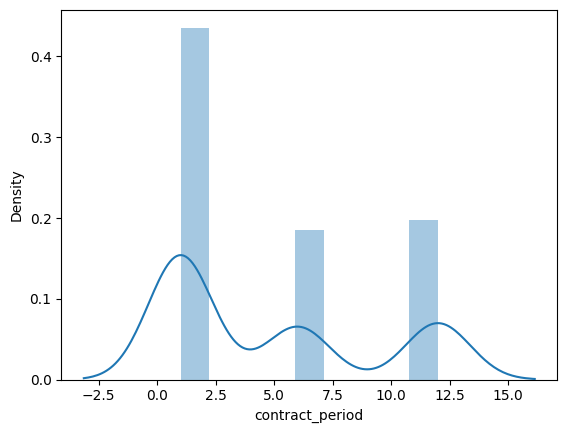

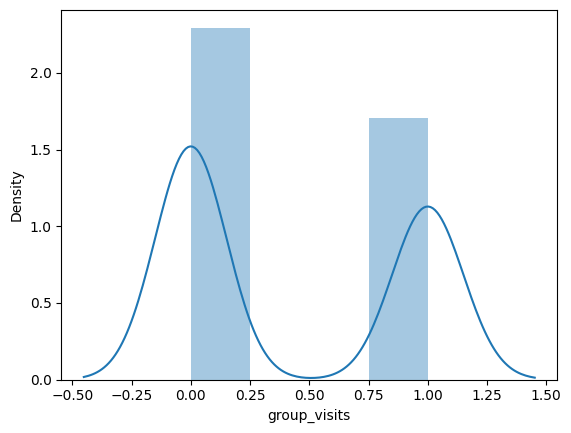

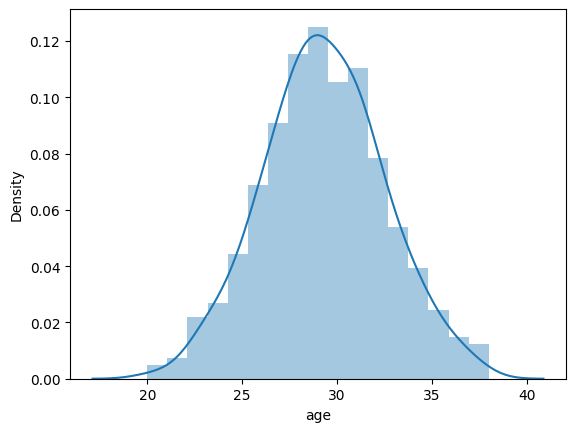

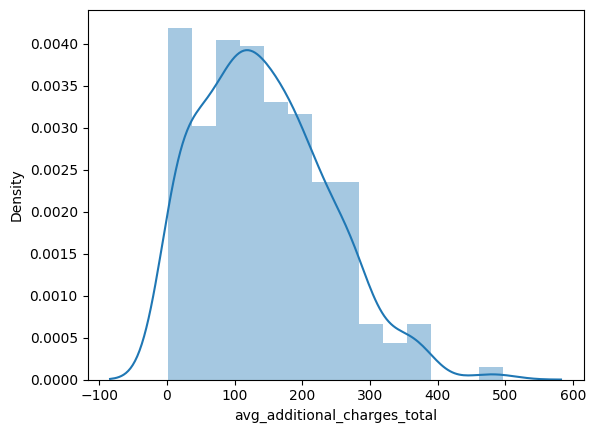

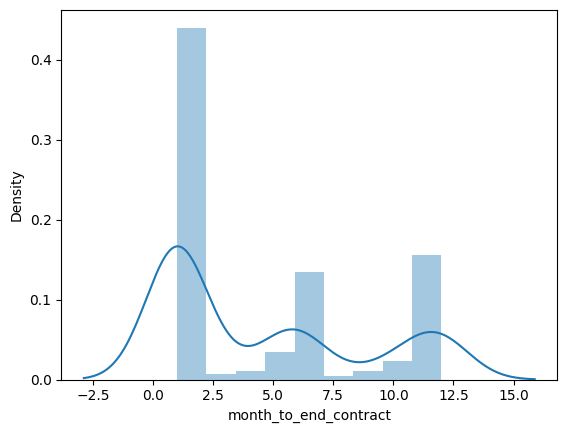

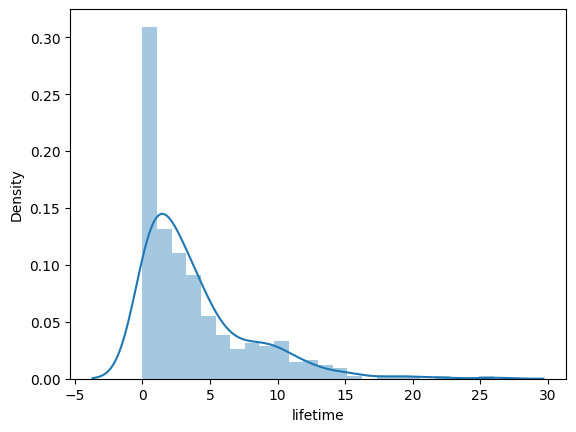

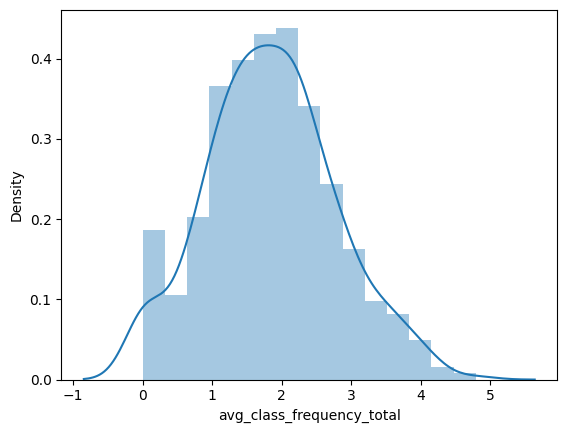

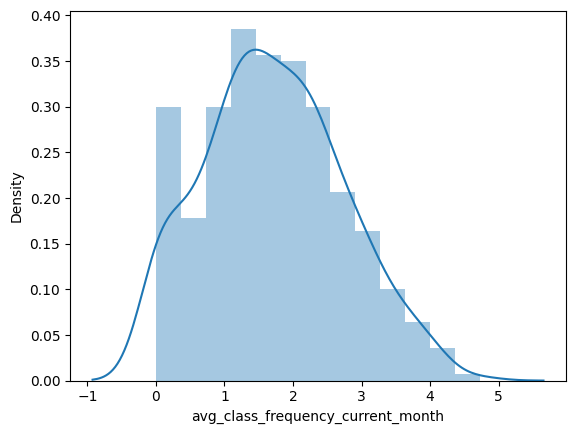

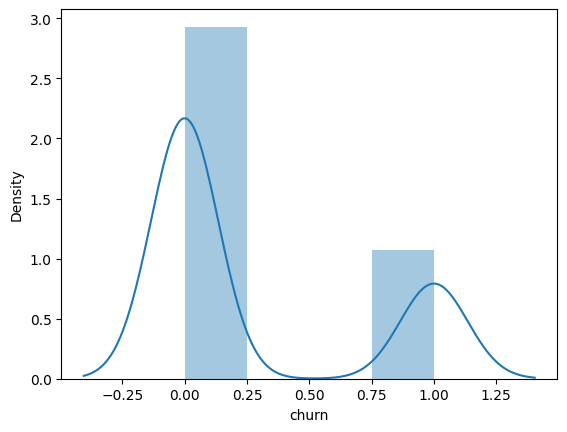

In [65]:
cluster_4 = datos[datos['cluster']==4]

for variable in variables_numericas:
    sns.distplot(cluster_0[variable], label= f"Distribucion de la columna{variable}")
    plt.show()

•	Los grupos más propensos a cancelación son el 0 y el 1.

•	Los grupos menos propensos a cancelación son los 2, 3 y 4.

•	Los grupos menos propensos a cancelación son los que mayor promedio de vida tienen, esto coincide con lo analizado en la matriz de correlación.

•	Los grupos menos propensos a cancelación son los que mayor consumo adicional registran.

# Recomendaciones:

* Dado que en dos de los tres grupos menos propensos a abandonar en promedios los usuarios trabajan en una compañía asociada, se recomienda realizar campañas en estas compañías para aumentar el número de clientes en las mismas, e incentivar a estos clientes para fidelizarlos, ya que el tiempo de vida también es un factor relevante en cuando a la propensión al abandono.

* Por otra parte, según las estadísticas medias por clúster los clientes referidos por promo amigos, son menos propensos a abandonar el gimnasio, se recomienda seguir fomentando esta estrategia para reclutar más clientes.

* Fomentar las sesiones grupales, ya que, en los grupos menos propensos a abandonar, alrededor del 50% de los clientes participaron en estas sesiones.